# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

# Loading data

In [4]:
raw_data_1=pd.read_csv('./2017-18.csv')
raw_data_2=pd.read_csv('./2016-17.csv')
raw_data_3=pd.read_csv('./2015-16.csv')
raw_data_4=pd.read_csv('./2014-15.csv')
raw_data_5=pd.read_csv('./2013-14.csv')
raw_data_6=pd.read_csv('./2012-13.csv')
raw_data_7=pd.read_csv('./2011-12.csv')
raw_data_8=pd.read_csv('./2010-11.csv')

# Data visualization 

In [5]:
raw_data_1.head()

Div      Date        HomeTeam      AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  E0  11/08/17         Arsenal     Leicester     4     3   H     2     2   D   
1  E0  12/08/17        Brighton      Man City     0     2   A     0     0   D   
2  E0  12/08/17         Chelsea       Burnley     2     3   A     0     3   A   
3  E0  12/08/17  Crystal Palace  Huddersfield     0     3   A     0     2   A   
4  E0  12/08/17         Everton         Stoke     1     0   H     1     0   H   

   ... BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA   PSCH  PSCD   PSCA  Unnamed: 65  \
0  ...    1.91     1.85     2.10     2.02   1.49  4.73   7.25          NaN   
1  ...    1.95     1.91     2.01     1.96  11.75  6.15   1.29          NaN   
2  ...    2.03     1.97     1.95     1.90   1.33  5.40  12.25          NaN   
3  ...    2.10     2.05     1.86     1.83   1.79  3.56   5.51          NaN   
4  ...    1.94     1.90     2.01     1.98   1.82  3.49   5.42          NaN   

   Unnamed: 66  Unnamed: 67  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 68 columns]

In [6]:
print(raw_data_1.shape)
print(raw_data_2.shape)
print(raw_data_3.shape)
print(raw_data_4.shape)
print(raw_data_5.shape)
print(raw_data_6.shape)
print(raw_data_7.shape)
print(raw_data_8.shape)

(304, 68)
(380, 65)
(380, 65)
(380, 68)
(380, 68)
(380, 74)
(380, 71)
(380, 71)


In [7]:
raw_data_1.dtypes

Div             object
Date            object
HomeTeam        object
AwayTeam        object
FTHG             int64
                ...   
PSCD           float64
PSCA           float64
Unnamed: 65    float64
Unnamed: 66    float64
Unnamed: 67    float64
Length: 68, dtype: object

In [8]:
raw_data_1.isnull().sum().sum()

912

In [9]:
raw_data_2.isnull().sum().sum()

0

In [10]:
raw_data_3.isnull().sum().sum()

3

In [11]:
raw_data_4.isnull().sum().sum()

1023

In [12]:
raw_data_5.isnull().sum().sum()

60

In [13]:
raw_data_6.isnull().sum().sum()

6

In [14]:
raw_data_7.isnull().sum().sum()

0

In [15]:
raw_data_8.isnull().sum().sum()

0

In [16]:
raw_data_6.Date.isnull().sum()

0

In [17]:
for i in range(len(raw_data_4.index)) :
    print("Nan in row ", i , " : " ,  raw_data_4.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  0
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  0
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  0
Nan in row  31  :  0
Nan in row  32  :  0
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  3
Nan in row  41  :  3
Nan in row  42  :  3
Nan in row  43  :  3
Nan in row  44  :  3
Nan in row  45  :  3
Nan in row  46  :  3
Nan in row  47  :  3
Na

In [18]:
raw_data_6.Date.dtype

dtype('O')

## Explore continuous data 

In [19]:
continuous_variables =['FTHG','FTAG','FTR','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']
continuous_data_df = raw_data_1[continuous_variables]

In [20]:
continuous_data_df.describe()

FTHG        FTAG        HTHG        HTAG          HS          AS  \
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000   
mean     1.546053    1.161184    0.595395    0.542763   13.674342   10.930921   
std      1.346497    1.209290    0.790274    0.773838    5.971539    4.984315   
min      0.000000    0.000000    0.000000    0.000000    2.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000    9.000000    7.000000   
50%      1.000000    1.000000    0.000000    0.000000   13.000000   10.000000   
75%      2.000000    2.000000    1.000000    1.000000   17.250000   14.000000   
max      7.000000    6.000000    4.000000    3.000000   35.000000   30.000000   

              HST         AST          HF          AF          HC          AC  \
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000   
mean     4.651316    3.763158   10.243421   10.582237    5.815789    4.601974   
std      2.725651    2.366535    3.204775    3.376264    3.062433    2.814882   
min      0.000000    0.000000    2.000000    3.000000    0.000000    0.000000   
25%      3.000000    2.000000    8.000000    8.000000    4.000000    2.000000   
50%      4.000000    3.500000   10.000000   10.000000    5.000000    4.000000   
75%      6.000000    5.000000   12.000000   13.000000    8.000000    6.000000   
max     15.000000   14.000000   19.000000   26.000000   18.000000   13.000000   

               HY          AY          HR          AR  
count  304.000000  304.000000  304.000000  304.000000  
mean     1.460526    1.572368    0.049342    0.055921  
std      1.209869    1.267007    0.231653    0.230148  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    1.000000    0.000000    0.000000  
50%      1.000000    1.000000    0.000000    0.000000  
75%      2.000000    2.000000    0.000000    0.000000  
max      6.000000    7.000000    2.000000    1.000000

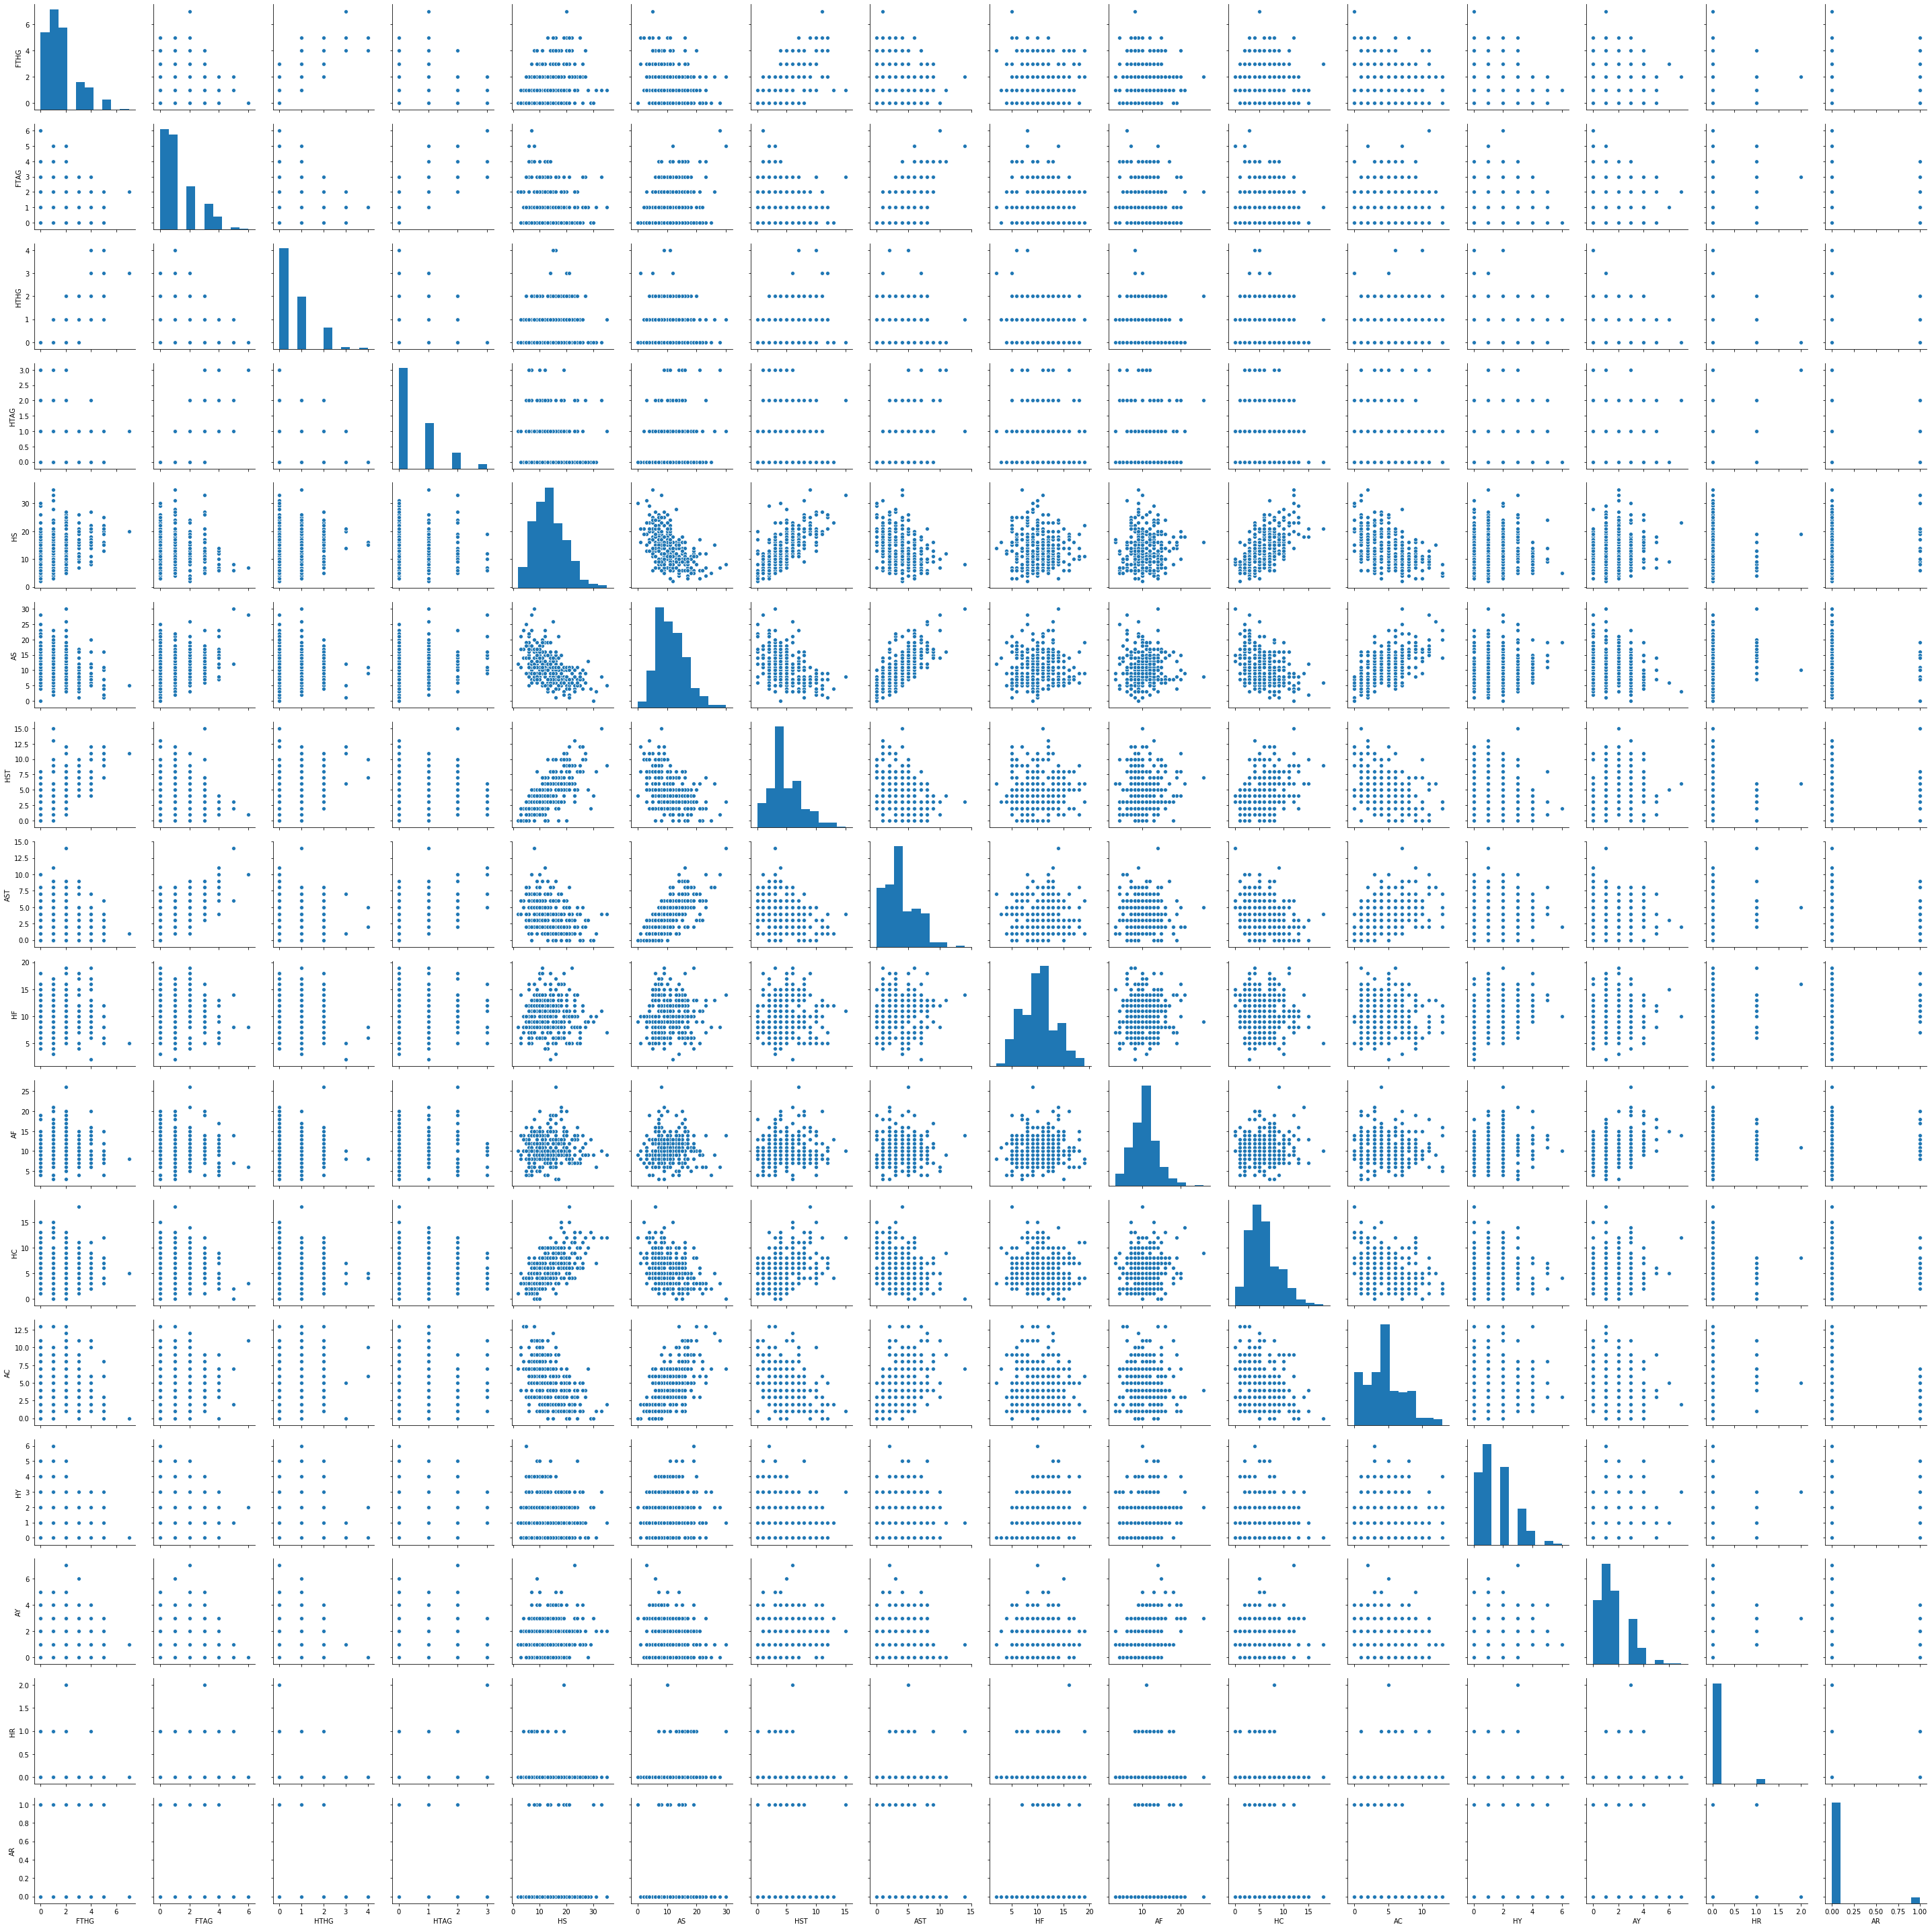

In [21]:
sns.pairplot(continuous_data_df)

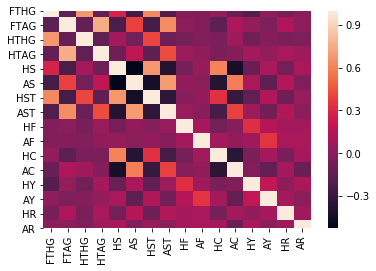

In [22]:
C = continuous_data_df.corr()
sns.heatmap(C)

## Explore numeric data

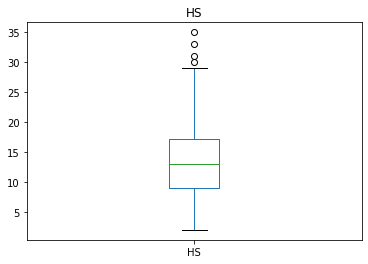

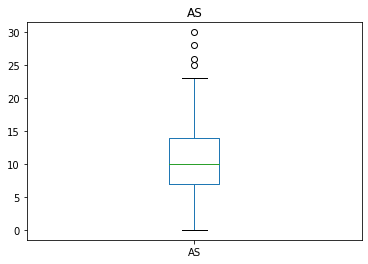

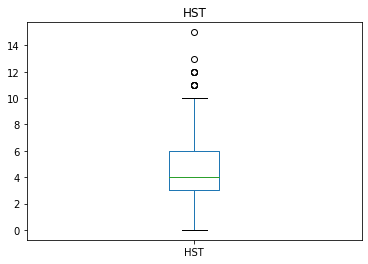

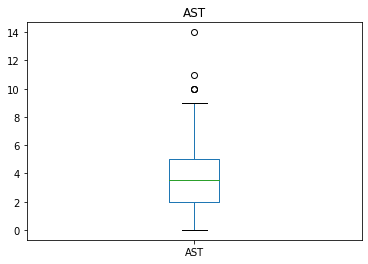

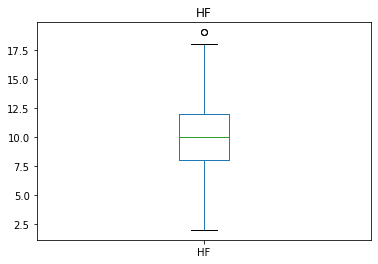

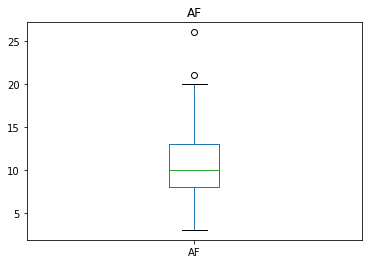

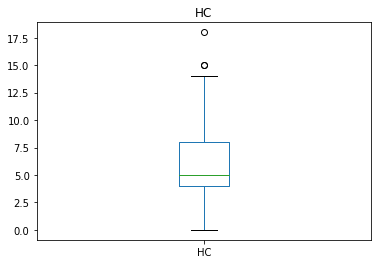

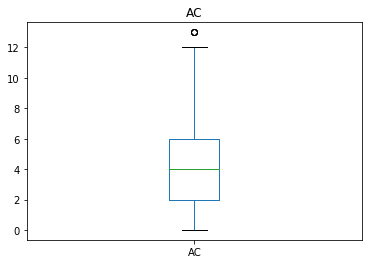

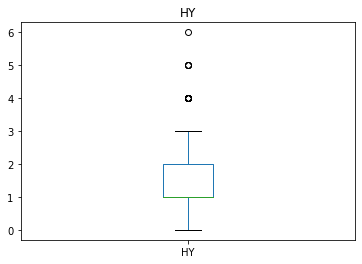

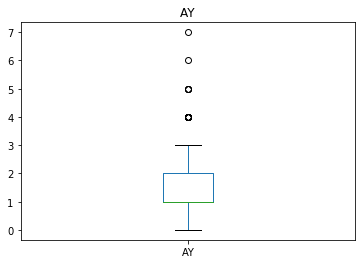

In [23]:
some_numeric_data=['HS','AS','HST','AST','HF','AF','HC','AC','HY','AY']
some_numeric_data = raw_data_1[some_numeric_data].copy()
for x in some_numeric_data:
    some_numeric_data[x].plot.box()
    plt.title(x)
    plt.show()

# Data preparation 

#### Remove useless columns and those with high amount of missing values/ outliers.

In [24]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

In [25]:
playing_statistics_1=raw_data_1[columns_req]
playing_statistics_2=raw_data_2[columns_req]
playing_statistics_3=raw_data_3[columns_req]
playing_statistics_4=raw_data_4[columns_req]
playing_statistics_5=raw_data_5[columns_req]
playing_statistics_6=raw_data_6[columns_req]
playing_statistics_7=raw_data_7[columns_req]
playing_statistics_8=raw_data_8[columns_req]

In [26]:
playing_statistics_3.head(50)

Date        HomeTeam        AwayTeam  FTHG  FTAG FTR
0   08/08/15     Bournemouth     Aston Villa     0     1   A
1   08/08/15         Chelsea         Swansea     2     2   D
2   08/08/15         Everton         Watford     2     2   D
3   08/08/15       Leicester      Sunderland     4     2   H
4   08/08/15      Man United       Tottenham     1     0   H
5   08/08/15         Norwich  Crystal Palace     1     3   A
6   09/08/15         Arsenal        West Ham     0     2   A
7   09/08/15       Newcastle     Southampton     2     2   D
8   09/08/15           Stoke       Liverpool     0     1   A
9   10/08/15       West Brom        Man City     0     3   A
10  14/08/15     Aston Villa      Man United     0     1   A
11  15/08/15     Southampton         Everton     0     3   A
12  15/08/15      Sunderland         Norwich     1     3   A
13  15/08/15         Swansea       Newcastle     2     0   H
14  15/08/15       Tottenham           Stoke     2     2   D
15  15/08/15         Watford       West Brom     0     0   D
16  15/08/15        West Ham       Leicester     1     2   A
17  16/08/15  Crystal Palace         Arsenal     1     2   A
18  16/08/15        Man City         Chelsea     3     0   H
19  17/08/15       Liverpool     Bournemouth     1     0   H
20  22/08/15  Crystal Palace     Aston Villa     2     1   H
21  22/08/15       Leicester       Tottenham     1     1   D
22  22/08/15      Man United       Newcastle     0     0   D
23  22/08/15         Norwich           Stoke     1     1   D
24  22/08/15      Sunderland         Swansea     1     1   D
25  22/08/15        West Ham     Bournemouth     3     4   A
26  23/08/15         Everton        Man City     0     2   A
27  23/08/15         Watford     Southampton     0     0   D
28  23/08/15       West Brom         Chelsea     2     3   A
29  24/08/15         Arsenal       Liverpool     0     0   D
30  29/08/15     Aston Villa      Sunderland     2     2   D
31  29/08/15     Bournemouth       Leicester     1     1   D
32  29/08/15         Chelsea  Crystal Palace     1     2   A
33  29/08/15       Liverpool        West Ham     0     3   A
34  29/08/15        Man City         Watford     2     0   H
35  29/08/15       Newcastle         Arsenal     0     1   A
36  29/08/15           Stoke       West Brom     0     1   A
37  29/08/15       Tottenham         Everton     0     0   D
38  30/08/15     Southampton         Norwich     3     0   H
39  30/08/15         Swansea      Man United     2     1   H
40  12/09/15         Arsenal           Stoke     2     0   H
41  12/09/15  Crystal Palace        Man City     0     1   A
42  12/09/15         Everton         Chelsea     3     1   H
43  12/09/15      Man United       Liverpool     3     1   H
44  12/09/15         Norwich     Bournemouth     3     1   H
45  12/09/15         Watford         Swansea     1     0   H
46  12/09/15       West Brom     Southampton     0     0   D
47  13/09/15       Leicester     Aston Villa     3     2   H
48  13/09/15      Sunderland       Tottenham     0     1   A
49  14/09/15        West Ham       Newcastle     2     0   H

#### For our task goal's score is an important feature, for that we created two functions to generate score cumulation for both home and away teams.  'get_goals_scored' funtion generates the cumulation of scored goals for corresponding team / 'get_goals_conceded' funtion generates the cumulation of received goals from the away team.

In [27]:
def get_goals_scored(playing_stat):
    print("get_goals_scored")
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    for i in range(len(playing_stat)):
            HTGS =playing_stat.iloc[i]['FTHG']
            ATGS = playing_stat.iloc[i]['FTAG']
            teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
            teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    print('goal Scored before add')
    print(GoalsScored)
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored
    print('goal Scored AFTER add')

    print(GoalsScored)
def get_goals_conceded(playing_stat):
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    for i in range(2,len(teams["Arsenal"])+1):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    print(GoalsConceded)
    return GoalsConceded

In [28]:
get_goals_scored(playing_statistics_3)

get_goals_scored
goal Scored before add
                1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          0   2   0   1   2   0   5   3   3   2  ...   2   4   3   1   
Aston Villa      1   0   1   2   2   0   2   0   0   1  ...   0   0   0   1   
Bournemouth      0   0   4   1   1   2   1   1   1   1  ...   3   0   0   2   
Chelsea          2   0   3   1   1   2   2   1   2   1  ...   2   4   0   0   
Crystal Palace   3   1   2   2   0   0   1   2   1   0  ...   0   2   1   0   
Everton          2   3   0   0   3   0   3   1   0   1  ...   0   1   0   1   
Leicester        4   2   1   1   3   2   2   2   2   1  ...   1   1   1   2   
Liverpool        1   1   0   0   1   1   3   1   0   1  ...   1   4   2   4   
Man City         3   3   2   2   1   1   1   6   5   0  ...   0   4   2   3   
Man United       1   1   0   1   3   3   3   0   3   0  ...   1   1   0   1   
Newcastle        2   0   0   0   0   1   2   1   6   0  ...   1   2   1   3   
Norwich     

1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          0   2   2   3   5   5  10  13  16  18  ...  48  52  55  56   
Aston Villa      1   1   2   4   6   6   8   8   8   9  ...  22  22  22  23   
Bournemouth      0   0   4   5   6   8   9  10  11  12  ...  38  38  38  40   
Chelsea          2   2   5   6   7   9  11  12  14  15  ...  45  49  49  49   
Crystal Palace   3   4   6   8   8   8   9  11  12  12  ...  32  34  35  35   
Everton          2   5   5   5   8   8  11  12  12  13  ...  51  52  52  53   
Leicester        4   6   7   8  11  13  15  17  19  20  ...  53  54  55  57   
Liverpool        1   2   2   2   3   4   7   8   8   9  ...  46  50  52  56   
Man City         3   6   8  10  11  12  13  19  24  24  ...  52  56  58  61   
Man United       1   2   2   3   6   9  12  12  15  15  ...  38  39  39  40   
Newcastle        2   2   2   2   2   3   5   6  12  12  ...  29  31  32  35   
Norwich          1   4   5   5   8   9  11  12  14  14  ...  31  32  35  35   
Southampton      2   2   2   5   5   7  10  13  15  16  ...  38  41  41  44   
Stoke            0   2   3   3   3   5   7   8   9   9  ...  32  34  36  37   
Sunderland       2   3   4   6   6   6   6   8   8  11  ...  36  36  36  39   
Swansea          2   4   5   7   7   7   8  10  10  12  ...  30  31  33  34   
Tottenham        0   2   3   3   4   5   9  11  11  16  ...  53  56  57  60   
Watford          2   2   2   2   3   5   5   6   6   8  ...  30  30  31  32   
West Brom        0   0   2   3   3   4   6   6   7   8  ...  30  30  31  31   
West Ham         2   3   6   9  11  13  15  17  20  22  ...  47  49  52  54   

                34  35  36  37  38  0   
Arsenal         58  58  59  61  65   0  
Aston Villa     23  25  27  27  27   0  
Bournemouth     41  42  43  44  45   0  
Chelsea         53  55  57  58  59   0  
Crystal Palace  36  36  36  38  39   0  
Everton         53  55  56  56  59   0  
Leicester       59  63  64  67  68   0  
Liverpool       58  59  61  62  63   0  
Man City        62  66  68  70  71   0  
Man United      42  43  44  46  49   0  
Newcastle       36  38  39  39  44   0  
Norwich         35  35  35  39  39   0  
Southampton     45  49  53  55  59   0  
Stoke           37  37  38  39  41   0  
Sunderland      39  40  43  46  48   0  
Swansea         34  34  37  41  42   0  
Tottenham       64  65  67  68  69   0  
Watford         33  36  36  38  40   0  
West Brom       31  32  32  33  34   0  
West Ham        57  60  61  64  65   0  

[20 rows x 39 columns]

In [29]:
get_goals_conceded(playing_statistics_3)

                1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          2   3   3   3   3   5   7   7   7   8  ...  30  30  33  34   
Aston Villa      0   1   3   5   8   9  12  13  15  17  ...  57  58  62  64   
Bournemouth      1   2   5   6   9   9  11  12  17  22  ...  47  50  54  55   
Chelsea          2   5   7   9  12  12  14  17  17  19  ...  41  41  42  45   
Crystal Palace   1   3   4   5   6   7   7   7  10  11  ...  40  42  42  42   
Everton          2   2   4   4   5   5   7   8  11  13  ...  42  43  43  44   
Leicester        2   3   4   5   7   9  14  15  17  17  ...  31  31  31  31   
Liverpool        0   0   0   3   6   7   9  10  10  11  ...  41  42  43  43   
Man City         0   0   0   0   0   2   6   7   8   8  ...  32  32  33  33   
Man United       0   0   0   2   3   5   5   8   8   8  ...  27  27  30  30   
Newcastle        2   4   4   5   7   9  11  17  19  22  ...  55  58  61  61   
Norwich          3   4   5   8   9  10  12  14  20  

1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          2   3   3   3   3   5   7   7   7   8  ...  30  30  33  34   
Aston Villa      0   1   3   5   8   9  12  13  15  17  ...  57  58  62  64   
Bournemouth      1   2   5   6   9   9  11  12  17  22  ...  47  50  54  55   
Chelsea          2   5   7   9  12  12  14  17  17  19  ...  41  41  42  45   
Crystal Palace   1   3   4   5   6   7   7   7  10  11  ...  40  42  42  42   
Everton          2   2   4   4   5   5   7   8  11  13  ...  42  43  43  44   
Leicester        2   3   4   5   7   9  14  15  17  17  ...  31  31  31  31   
Liverpool        0   0   0   3   6   7   9  10  10  11  ...  41  42  43  43   
Man City         0   0   0   0   0   2   6   7   8   8  ...  32  32  33  33   
Man United       0   0   0   2   3   5   5   8   8   8  ...  27  27  30  30   
Newcastle        2   4   4   5   7   9  11  17  19  22  ...  55  58  61  61   
Norwich          3   4   5   8   9  10  12  14  20  21  ...  54  54  56  57   
Southampton      2   5   5   5   5   8   9  10  12  13  ...  30  32  33  34   
Stoke            1   3   4   5   7   9  10  10  10  12  ...  36  37  39  43   
Sunderland       4   7   8  10  11  13  16  18  19  19  ...  55  55  57  57   
Swansea          2   2   3   4   5   5   8  10  11  12  ...  40  40  42  42   
Tottenham        1   3   4   4   4   4   5   7   7   8  ...  24  24  25  25   
Watford          2   2   2   4   4   5   6   7  10  10  ...  32  36  37  37   
West Brom        3   3   6   6   6   6   9  11  11  11  ...  37  37  39  40   
West Ham         0   2   6   6   6   7   9  11  12  13  ...  35  37  40  42   

                34  35  36  37  38  0   
Arsenal         34  34  34  36  36   0  
Aston Villa     65  69  72  72  76   0  
Bournemouth     57  61  63  64  67   0  
Chelsea         46  48  51  52  53   0  
Crystal Palace  43  45  46  47  51   0  
Everton         48  49  52  55  55   0  
Leicester       33  33  34  35  36   0  
Liverpool       45  48  48  49  50   0  
Man City        34  34  38  40  41   0  
Man United      30  31  31  34  35   0  
Newcastle       62  64  64  64  65   0  
Norwich         60  61  62  64  67   0  
Southampton     35  37  39  40  41   0  
Stoke           47  51  52  54  55   0  
Sunderland      57  58  60  60  62   0  
Swansea         45  49  50  51  52   0  
Tottenham       25  26  28  30  35   0  
Watford         40  42  44  48  50   0  
West Brom       42  43  46  47  48   0  
West Ham        43  43  47  49  51   0  

[20 rows x 39 columns]

In [30]:
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        print(j)
        ht = playing_stat.iloc[i].HomeTeam
        print("ht value is", ht)
        at = playing_stat.iloc[i].AwayTeam
        print("at value is", at)
        HTGS.append(GS.loc[ht][j])
        print("GS.loc[ht] value is",GS.loc[ht])
        ATGS.append(GS.loc[at][j])
        print("GS.loc[at][j] value is",GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1    
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    print(playing_stat)
    return playing_stat 

In [31]:
playing_statistics_2 = get_gss(playing_statistics_2)

                1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          4   4   5   6   7   7   7   9   9  10  ...  39  40  40  42   
Bournemouth      3   4   5   5   9   9  11  12  12  14  ...  54  56  59  63   
Burnley          1   1   4   5   8   8   9  12  13  13  ...  44  44  44  47   
Chelsea          1   2   2   4   6   9   9   9   9   9  ...  24  25  27  29   
Crystal Palace   1   2   3   4   5   7   8   9  12  16  ...  50  50  52  53   
Everton          1   2   2   2   3   4   5   6   8   8  ...  33  34  36  37   
Hull             1   1   2   3   7  12  14  20  22  23  ...  59  61  64  67   
Leicester        2   2   3   7   7  11  11  14  15  16  ...  47  51  53  54   
Liverpool        3   5   6   7   8   9  10  10  11  13  ...  37  39  40  40   
Man City         1   2   3   4   4   5   7   8   9   9  ...  34  35  35  35   
Man United       1   1   1   3   6   7   8   8  12  12  ...  24  24  24  24   
Middlesbrough    1   2   2   4   7   9  10  11  11  

3
ht value is Sunderland
at value is Everton
GS.loc[ht] value is 1      1
2      2
3      3
4      3
5      3
6      5
7      6
8      6
9      6
10     7
11     9
12    12
13    12
14    14
15    14
16    14
17    15
18    16
19    17
20    19
21    20
22    20
23    20
24    24
25    24
26    24
27    24
28    24
29    24
30    24
31    24
32    26
33    26
34    26
35    28
36    28
37    28
38    29
0      0
Name: Sunderland, dtype: int64
GS.loc[at][j] value is 4
4
ht value is Chelsea
at value is Liverpool
GS.loc[ht] value is 1      2
2      4
3      7
4      9
5     10
6     10
7     12
8     15
9     19
10    21
11    26
12    27
13    29
14    32
15    33
16    34
17    35
18    38
19    42
20    42
21    45
22    47
23    48
24    51
25    52
26    55
27    57
28    59
29    60
30    62
31    65
32    65
33    69
34    72
35    75
36    76
37    80
38    85
0      0
Name: Chelsea, dtype: int64
GS.loc[at][j] value is 9
4
ht value is Everton
at value is Middlesbrough
GS.loc[ht] v

Name: Liverpool, dtype: int64
GS.loc[at][j] value is 12
12
ht value is Swansea
at value is Crystal Palace
GS.loc[ht] value is 1      1
2      1
3      2
4      4
5      4
6      5
7      6
8      8
9      8
10     9
11    10
12    11
13    16
14    16
15    19
16    20
17    20
18    21
19    21
20    23
21    23
22    26
23    28
24    29
25    31
26    32
27    35
28    36
29    36
30    36
31    37
32    37
33    37
34    39
35    40
36    41
37    43
38    45
0      0
Name: Swansea, dtype: int64
GS.loc[at][j] value is 17
12
ht value is Arsenal
at value is Bournemouth
GS.loc[ht] value is 1      3
2      3
3      6
4      8
5     12
6     15
7     16
8     19
9     19
10    23
11    24
12    25
13    28
14    33
15    36
16    37
17    38
18    39
19    41
20    44
21    48
22    50
23    51
24    52
25    54
26    55
27    56
28    58
29    61
30    61
31    63
32    64
33    64
34    66
35    68
36    72
37    74
38    77
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 

GS.loc[ht] value is 1      2
2      4
3      7
4      9
5     10
6     10
7     12
8     15
9     19
10    21
11    26
12    27
13    29
14    32
15    33
16    34
17    35
18    38
19    42
20    42
21    45
22    47
23    48
24    51
25    52
26    55
27    57
28    59
29    60
30    62
31    65
32    65
33    69
34    72
35    75
36    76
37    80
38    85
0      0
Name: Chelsea, dtype: int64
GS.loc[at][j] value is 20
18
ht value is Leicester
at value is West Ham
GS.loc[ht] value is 1      1
2      1
3      3
4      4
5      7
6      8
7      8
8      8
9     11
10    12
11    13
12    14
13    16
14    17
15    21
16    21
17    23
18    23
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    27
27    30
28    33
29    35
30    37
31    39
32    41
33    41
34    42
35    45
36    46
37    47
38    48
0      0
Name: Leicester, dtype: int64
GS.loc[at][j] value is 23
18
ht value is Liverpool
at value is Man City
GS.loc[ht] value is 1      4
2      4
3      5
4      9


GS.loc[ht] value is 1      1
2      2
3      3
4      7
5     10
6     10
7     12
8     13
9     13
10    14
11    15
12    17
13    17
14    18
15    21
16    21
17    21
18    22
19    23
20    23
21    23
22    25
23    27
24    29
25    29
26    30
27    33
28    33
29    34
30    36
31    36
32    37
33    37
34    37
35    37
36    37
37    40
38    40
0      0
Name: Watford, dtype: int64
GS.loc[at][j] value is 34
25
ht value is West Brom
at value is Bournemouth
GS.loc[ht] value is 1      1
2      2
3      2
4      2
5      6
6      7
7      8
8      9
9     10
10    10
11    12
12    16
13    17
14    20
15    20
16    23
17    23
18    23
19    25
20    28
21    28
22    30
23    31
24    32
25    34
26    36
27    36
28    36
29    39
30    39
31    39
32    39
33    39
34    39
35    41
36    41
37    42
38    43
0      0
Name: West Brom, dtype: int64
GS.loc[at][j] value is 35
25
ht value is Tottenham
at value is Stoke
GS.loc[ht] value is 1      1
2      2
3      3
4      7


GS.loc[at][j] value is 46
35
ht value is Swansea
at value is Everton
GS.loc[ht] value is 1      1
2      1
3      2
4      4
5      4
6      5
7      6
8      8
9      8
10     9
11    10
12    11
13    16
14    16
15    19
16    20
17    20
18    21
19    21
20    23
21    23
22    26
23    28
24    29
25    31
26    32
27    35
28    36
29    36
30    36
31    37
32    37
33    37
34    39
35    40
36    41
37    43
38    45
0      0
Name: Swansea, dtype: int64
GS.loc[at][j] value is 60
35
ht value is Arsenal
at value is Man United
GS.loc[ht] value is 1      3
2      3
3      6
4      8
5     12
6     15
7     16
8     19
9     19
10    23
11    24
12    25
13    28
14    33
15    36
16    37
17    38
18    39
19    41
20    44
21    48
22    50
23    51
24    52
25    54
26    55
27    56
28    58
29    61
30    61
31    63
32    64
33    64
34    66
35    68
36    72
37    74
38    77
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 51
35
ht value is Liverpool
at value i

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [32]:
playing_statistics_3 = get_gss(playing_statistics_3)

                1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          2   3   3   3   3   5   7   7   7   8  ...  30  30  33  34   
Aston Villa      0   1   3   5   8   9  12  13  15  17  ...  57  58  62  64   
Bournemouth      1   2   5   6   9   9  11  12  17  22  ...  47  50  54  55   
Chelsea          2   5   7   9  12  12  14  17  17  19  ...  41  41  42  45   
Crystal Palace   1   3   4   5   6   7   7   7  10  11  ...  40  42  42  42   
Everton          2   2   4   4   5   5   7   8  11  13  ...  42  43  43  44   
Leicester        2   3   4   5   7   9  14  15  17  17  ...  31  31  31  31   
Liverpool        0   0   0   3   6   7   9  10  10  11  ...  41  42  43  43   
Man City         0   0   0   0   0   2   6   7   8   8  ...  32  32  33  33   
Man United       0   0   0   2   3   5   5   8   8   8  ...  27  27  30  30   
Newcastle        2   4   4   5   7   9  11  17  19  22  ...  55  58  61  61   
Norwich          3   4   5   8   9  10  12  14  20  

at value is Liverpool
GS.loc[ht] value is 1      0
2      2
3      3
4      3
5      4
6      5
7      9
8     11
9     11
10    16
11    19
12    20
13    24
14    24
15    25
16    26
17    28
18    31
19    33
20    34
21    34
22    38
23    41
24    44
25    45
26    47
27    49
28    49
29    51
30    53
31    56
32    57
33    60
34    64
35    65
36    67
37    68
38    69
0      0
Name: Tottenham, dtype: int64
GS.loc[at][j] value is 8
8
ht value is Watford
at value is Arsenal
GS.loc[ht] value is 1      2
2      2
3      2
4      2
5      3
6      5
7      5
8      6
9      6
10     8
11    10
12    11
13    12
14    15
15    17
16    18
17    21
18    23
19    24
20    25
21    25
22    25
23    27
24    27
25    27
26    29
27    29
28    29
29    29
30    30
31    30
32    31
33    32
34    33
35    36
36    36
37    38
38    40
0      0
Name: Watford, dtype: int64
GS.loc[at][j] value is 13
8
ht value is West Brom
at value is Sunderland
GS.loc[ht] value is 1      0
2      0


Name: Man City, dtype: int64
GS.loc[at][j] value is 14
15
ht value is Norwich
at value is Everton
GS.loc[ht] value is 1      1
2      4
3      5
4      5
5      8
6      9
7     11
8     12
9     14
10    14
11    15
12    16
13    16
14    17
15    17
16    18
17    20
18    20
19    22
20    23
21    24
22    24
23    28
24    28
25    28
26    30
27    30
28    31
29    31
30    31
31    32
32    35
33    35
34    35
35    35
36    35
37    39
38    39
0      0
Name: Norwich, dtype: int64
GS.loc[at][j] value is 28
15
ht value is Sunderland
at value is Watford
GS.loc[ht] value is 1      2
2      3
3      4
4      6
5      6
6      6
7      6
8      8
9      8
10    11
11    13
12    13
13    14
14    16
15    17
16    17
17    18
18    19
19    19
20    22
21    26
22    27
23    28
24    28
25    30
26    32
27    32
28    34
29    35
30    36
31    36
32    36
33    39
34    39
35    40
36    43
37    46
38    48
0      0
Name: Sunderland, dtype: int64
GS.loc[at][j] value is 17
15


ht value is Norwich
at value is West Ham
GS.loc[ht] value is 1      1
2      4
3      5
4      5
5      8
6      9
7     11
8     12
9     14
10    14
11    15
12    16
13    16
14    17
15    17
16    18
17    20
18    20
19    22
20    23
21    24
22    24
23    28
24    28
25    28
26    30
27    30
28    31
29    31
30    31
31    32
32    35
33    35
34    35
35    35
36    35
37    39
38    39
0      0
Name: Norwich, dtype: int64
GS.loc[at][j] value is 38
25
ht value is Sunderland
at value is Man United
GS.loc[ht] value is 1      2
2      3
3      4
4      6
5      6
6      6
7      6
8      8
9      8
10    11
11    13
12    13
13    14
14    16
15    17
16    17
17    18
18    19
19    19
20    22
21    26
22    27
23    28
24    28
25    30
26    32
27    32
28    34
29    35
30    36
31    36
32    36
33    39
34    39
35    40
36    43
37    46
38    48
0      0
Name: Sunderland, dtype: int64
GS.loc[at][j] value is 32
25
ht value is Swansea
at value is Southampton
GS.loc[ht]

ht value is Sunderland
at value is Leicester
GS.loc[ht] value is 1      2
2      3
3      4
4      6
5      6
6      6
7      6
8      8
9      8
10    11
11    13
12    13
13    14
14    16
15    17
16    17
17    18
18    19
19    19
20    22
21    26
22    27
23    28
24    28
25    30
26    32
27    32
28    34
29    35
30    36
31    36
32    36
33    39
34    39
35    40
36    43
37    46
38    48
0      0
Name: Sunderland, dtype: int64
GS.loc[at][j] value is 55
32
ht value is Tottenham
at value is Man United
GS.loc[ht] value is 1      0
2      2
3      3
4      3
5      4
6      5
7      9
8     11
9     11
10    16
11    19
12    20
13    24
14    24
15    25
16    26
17    28
18    31
19    33
20    34
21    34
22    38
23    41
24    44
25    45
26    47
27    49
28    49
29    51
30    53
31    56
32    57
33    60
34    64
35    65
36    67
37    68
38    69
0      0
Name: Tottenham, dtype: int64
GS.loc[at][j] value is 39
32
ht value is Crystal Palace
at value is Everton
GS

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [33]:
playing_statistics_4 = get_gss(playing_statistics_4)

                1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          1   3   4   6   6   7   9  11  11  11  ...  31  32  32  32   
Aston Villa      0   0   1   1   4   7   9  12  14  16  ...  39  42  45  45   
Burnley          3   4   4   4   4   8  10  13  16  19  ...  49  49  50  51   
Chelsea          1   1   4   6   7   7   7   8   9  10  ...  26  26  26  26   
Crystal Palace   2   5   8   8  10  10  12  14  16  19  ...  41  42  43  45   
Everton          2   4  10  10  13  14  16  16  17  17  ...  42  42  43  43   
Hull             0   1   3   5   7  11  11  13  13  14  ...  40  43  45  45   
Leicester        2   4   5   5   8  10  12  13  15  16  ...  49  51  51  51   
Liverpool        1   4   4   5   8   9  10  12  12  13  ...  32  36  36  36   
Man City         0   1   2   4   5   7   7   8  10  10  ...  28  30  34  34   
Man United       2   3   3   3   8   9  10  12  13  14  ...  27  28  30  31   
Newcastle        2   2   5   9  11  12  14  14  15  

GS.loc[ht] value is 1      2
2      4
3      5
4      7
5     10
6     11
7     11
8     13
9     15
10    18
11    19
12    20
13    21
14    22
15    24
16    28
17    30
18    32
19    34
20    34
21    37
22    39
23    44
24    45
25    47
26    49
27    51
28    53
29    56
30    58
31    62
32    63
33    63
34    66
35    66
36    67
37    67
38    71
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 5
3
ht value is Chelsea
at value is Swansea
GS.loc[ht] value is 1      3
2      5
3     11
4     15
5     16
6     19
7     21
8     23
9     24
10    26
11    28
12    30
13    30
14    33
15    34
16    36
17    38
18    40
19    41
20    44
21    46
22    51
23    52
24    54
25    55
26    56
27    57
28    58
29    61
30    63
31    64
32    65
33    65
34    68
35    69
36    70
37    70
38    73
0      0
Name: Chelsea, dtype: int64
GS.loc[at][j] value is 6
3
ht value is Crystal Palace
at value is Burnley
GS.loc[ht] value is 1      1
2      2
3      5
4      5
5    

GS.loc[ht] value is 1      1
2      2
3      2
4      6
5      9
6     11
7     13
8     15
9     16
10    16
11    17
12    19
13    22
14    24
15    26
16    29
17    30
18    33
19    33
20    34
21    34
22    36
23    39
24    40
25    43
26    44
27    46
28    47
29    50
30    52
31    55
32    59
33    59
34    59
35    59
36    61
37    62
38    62
0      0
Name: Man United, dtype: int64
GS.loc[at][j] value is 14
10
ht value is QPR
at value is Man City
GS.loc[ht] value is 1      0
2      0
3      1
4      1
5      3
6      4
7      4
8      6
9      8
10     9
11    11
12    11
13    14
14    14
15    16
16    17
17    20
18    21
19    21
20    22
21    23
22    23
23    24
24    24
25    26
26    27
27    28
28    29
29    30
30    31
31    35
32    38
33    38
34    38
35    39
36    39
37    41
38    42
0      0
Name: QPR, dtype: int64
GS.loc[at][j] value is 20
10
ht value is Southampton
at value is Leicester
GS.loc[ht] value is 1      1
2      1
3      4
4      8
5     

at value is Chelsea
GS.loc[ht] value is 1      0
2      1
3      2
4      2
5      4
6      5
7      6
8      8
9      8
10    10
11    12
12    13
13    13
14    14
15    17
16    18
17    18
18    19
19    21
20    22
21    22
22    23
23    26
24    27
25    28
26    30
27    31
28    33
29    33
30    34
31    35
32    36
33    38
34    39
35    39
36    42
37    42
38    48
0      0
Name: Stoke, dtype: int64
GS.loc[at][j] value is 36
17
ht value is Arsenal
at value is QPR
GS.loc[ht] value is 1      2
2      4
3      5
4      7
5     10
6     11
7     11
8     13
9     15
10    18
11    19
12    20
13    21
14    22
15    24
16    28
17    30
18    32
19    34
20    34
21    37
22    39
23    44
24    45
25    47
26    49
27    51
28    53
29    56
30    58
31    62
32    63
33    63
34    66
35    66
36    67
37    67
38    71
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 20
17
ht value is Burnley
at value is Liverpool
GS.loc[ht] value is 1      1
2      1
3      1
4

GS.loc[at][j] value is 20
23
ht value is QPR
at value is Southampton
GS.loc[ht] value is 1      0
2      0
3      1
4      1
5      3
6      4
7      4
8      6
9      8
10     9
11    11
12    11
13    14
14    14
15    16
16    17
17    20
18    21
19    21
20    22
21    23
22    23
23    24
24    24
25    26
26    27
27    28
28    29
29    30
30    31
31    35
32    38
33    38
34    38
35    39
36    39
37    41
38    42
0      0
Name: QPR, dtype: int64
GS.loc[at][j] value is 37
23
ht value is Swansea
at value is Sunderland
GS.loc[ht] value is 1      2
2      3
3      6
4      8
5      8
6      8
7     10
8     11
9     13
10    13
11    15
12    16
13    17
14    19
15    20
16    21
17    22
18    23
19    24
20    25
21    26
22    26
23    27
24    28
25    28
26    30
27    31
28    33
29    33
30    34
31    37
32    38
33    38
34    41
35    43
36    44
37    46
38    46
0      0
Name: Swansea, dtype: int64
GS.loc[at][j] value is 21
23
ht value is Tottenham
at value is Ar

GS.loc[ht] value is 1      2
2      2
3      3
4      4
5      9
6      9
7     11
8     11
9     11
10    11
11    11
12    11
13    13
14    14
15    15
16    15
17    15
18    16
19    17
20    19
21    20
22    20
23    21
24    21
25    22
26    24
27    24
28    24
29    27
30    29
31    32
32    34
33    35
34    36
35    39
36    41
37    41
38    46
0      0
Name: Leicester, dtype: int64
GS.loc[at][j] value is 26
28
ht value is Sunderland
at value is Aston Villa
GS.loc[ht] value is 1      2
2      3
3      3
4      5
5      5
6      5
7      8
8      8
9      8
10    11
11    12
12    12
13    12
14    13
15    13
16    14
17    15
18    16
19    16
20    18
21    18
22    19
23    21
24    22
25    22
26    22
27    22
28    23
29    23
30    23
31    24
32    25
33    26
34    28
35    30
36    30
37    30
38    31
0      0
Name: Sunderland, dtype: int64
GS.loc[at][j] value is 15
28
ht value is West Brom
at value is Stoke
GS.loc[ht] value is 1      2
2      2
3      2
4    

37
ht value is Aston Villa
at value is Burnley
GS.loc[ht] value is 1      1
2      1
3      3
4      4
5      4
6      4
7      4
8      4
9      4
10     5
11     5
12     6
13     7
14     8
15    10
16    10
17    11
18    11
19    11
20    11
21    11
22    11
23    11
24    12
25    12
26    13
27    13
28    15
29    19
30    19
31    20
32    23
33    24
34    26
35    29
36    30
37    31
38    31
0      0
Name: Aston Villa, dtype: int64
GS.loc[at][j] value is 27
37
ht value is Chelsea
at value is Sunderland
GS.loc[ht] value is 1      3
2      5
3     11
4     15
5     16
6     19
7     21
8     23
9     24
10    26
11    28
12    30
13    30
14    33
15    34
16    36
17    38
18    40
19    41
20    44
21    46
22    51
23    52
24    54
25    55
26    56
27    57
28    58
29    61
30    63
31    64
32    65
33    65
34    68
35    69
36    70
37    70
38    73
0      0
Name: Chelsea, dtype: int64
GS.loc[at][j] value is 30
37
ht value is Crystal Palace
at value is Swansea
GS.

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [34]:
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)

                1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  \
Arsenal          3   4   4   5   6   7   8   9   9   9  ...  34  36  37  40   
Aston Villa      1   3   4   6   6   8   8  10  12  12  ...  42  46  48  49   
Cardiff          2   4   4   5   6   7   9  13  13  13  ...  52  58  61  64   
Chelsea          0   1   1   2   2   3   4   5   6   8  ...  23  23  24  24   
Crystal Palace   1   3   4   6   8  10  13  17  19  21  ...  39  39  39  39   
Everton          2   2   2   2   4   6   9  10  10  10  ...  30  31  31  31   
Fulham           0   3   4   5   7   9   9  10  12  15  ...  65  70  73  74   
Hull             2   2   4   5   7   7   7   9  10  10  ...  37  39  40  40   
Liverpool        0   0   0   2   3   4   5   7   8  10  ...  38  39  39  40   
Man City         0   3   3   3   4   7   8   9  11  11  ...  28  29  32  34   
Man United       1   1   2   2   6   8   9  10  12  13  ...  34  37  38  38   
Newcastle        4   4   4   5   8  11  12  14  16  

GS.loc[ht] value is 1      1
2      2
3      2
4      2
5      3
6      5
7      7
8      8
9     10
10    11
11    15
12    15
13    16
14    18
15    19
16    20
17    22
18    25
19    26
20    26
21    27
22    29
23    31
24    34
25    36
26    37
27    38
28    38
29    39
30    43
31    45
32    49
33    50
34    50
35    50
36    52
37    53
38    54
0      0
Name: Southampton, dtype: int64
GS.loc[at][j] value is 2
3
ht value is Swansea
at value is Liverpool
GS.loc[ht] value is 1      1
2      1
3      3
4      5
5      7
6      8
7      8
8     12
9     12
10    12
11    15
12    17
13    17
14    20
15    21
16    22
17    23
18    23
19    24
20    26
21    26
22    27
23    29
24    29
25    32
26    33
27    36
28    37
29    38
30    40
31    42
32    45
33    45
34    45
35    47
36    51
37    51
38    54
0      0
Name: Swansea, dtype: int64
GS.loc[at][j] value is 3
4
ht value is Chelsea
at value is Fulham
GS.loc[ht] value is 1      2
2      4
3      4
4      4
5      

Name: Liverpool, dtype: int64
GS.loc[at][j] value is 10
10
ht value is Norwich
at value is West Ham
GS.loc[ht] value is 1      2
2      2
3      3
4      3
5      3
6      4
7      5
8      6
9      6
10     6
11     9
12    10
13    11
14    12
15    14
16    15
17    15
18    16
19    16
20    17
21    17
22    18
23    18
24    19
25    19
26    19
27    20
28    21
29    22
30    24
31    26
32    26
33    26
34    26
35    28
36    28
37    28
38    28
0      0
Name: Norwich, dtype: int64
GS.loc[at][j] value is 8
10
ht value is Southampton
at value is Hull
GS.loc[ht] value is 1      1
2      2
3      2
4      2
5      3
6      5
7      7
8      8
9     10
10    11
11    15
12    15
13    16
14    18
15    19
16    20
17    22
18    25
19    26
20    26
21    27
22    29
23    31
24    34
25    36
26    37
27    38
28    38
29    39
30    43
31    45
32    49
33    50
34    50
35    50
36    52
37    53
38    54
0      0
Name: Southampton, dtype: int64
GS.loc[at][j] value is 8
10
h

GS.loc[ht] value is 1      1
2      4
3      5
4      8
5     11
6     13
7     14
8     18
9     20
10    22
11    22
12    24
13    27
14    29
15    30
16    33
17    33
18    36
19    37
20    39
21    41
22    43
23    45
24    47
25    48
26    48
27    52
28    52
29    53
30    53
31    55
32    56
33    56
34    59
35    62
36    65
37    66
38    68
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 22
21
ht value is Crystal Palace
at value is Stoke
GS.loc[ht] value is 1      0
2      1
3      4
4      4
5      4
6      4
7      5
8      6
9      6
10     6
11     6
12     7
13     7
14     8
15    10
16    11
17    11
18    12
19    12
20    13
21    13
22    14
23    15
24    15
25    18
26    18
27    19
28    19
29    19
30    19
31    20
32    23
33    24
34    27
35    28
36    28
37    31
38    33
0      0
Name: Crystal Palace, dtype: int64
GS.loc[at][j] value is 22
21
ht value is Liverpool
at value is Aston Villa
GS.loc[ht] value is 1       1
2       2
3     

GS.loc[at][j] value is 43
30
ht value is Arsenal
at value is Swansea
GS.loc[ht] value is 1      1
2      4
3      5
4      8
5     11
6     13
7     14
8     18
9     20
10    22
11    22
12    24
13    27
14    29
15    30
16    33
17    33
18    36
19    37
20    39
21    41
22    43
23    45
24    47
25    48
26    48
27    52
28    52
29    53
30    53
31    55
32    56
33    56
34    59
35    62
36    65
37    66
38    68
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 40
30
ht value is Man United
at value is Man City
GS.loc[ht] value is 1      4
2      4
3      4
4      6
5      7
6      8
7     10
8     11
9     14
10    17
11    18
12    20
13    22
14    22
15    22
16    25
17    28
18    31
19    32
20    33
21    35
22    36
23    38
24    39
25    41
26    41
27    43
28    46
29    46
30    48
31    48
32    52
33    56
34    56
35    60
36    60
37    63
38    64
0      0
Name: Man United, dtype: int64
GS.loc[at][j] value is 80
30
ht value is Newcastle
at val

at value is Tottenham
GS.loc[ht] value is 1      2
2      2
3      2
4      2
5      4
6      4
7      7
8      8
9      8
10     8
11     9
12     9
13    12
14    12
15    13
16    13
17    14
18    15
19    18
20    19
21    21
22    22
23    22
24    24
25    26
26    28
27    31
28    31
29    32
30    32
31    34
32    36
33    37
34    38
35    38
36    38
37    40
38    40
0      0
Name: West Ham, dtype: int64
GS.loc[at][j] value is 52
36
ht value is Arsenal
at value is West Brom
GS.loc[ht] value is 1      1
2      4
3      5
4      8
5     11
6     13
7     14
8     18
9     20
10    22
11    22
12    24
13    27
14    29
15    30
16    33
17    33
18    36
19    37
20    39
21    41
22    43
23    45
24    47
25    48
26    48
27    52
28    52
29    53
30    53
31    55
32    56
33    56
34    59
35    62
36    65
37    66
38    68
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 42
36
ht value is Chelsea
at value is Norwich
GS.loc[ht] value is 1      2
2      4
3

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

             1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  34  \
Arsenal       0   0   0   1   2   4   5   6   6   8  ...  33  34  35  35  35   
Aston Villa   1   4   5   5   9  10  12  13  14  14  ...  56  58  59  60  63   
Chelsea       0   2   2   2   2   3   4   6   9  10  ...  32  33  33  35  35   
Everton       0   1   3   5   5   6   8   9  11  13  ...  35  37  37  37  38   
Fulham        0   3   6   6   7   9  11  11  14  16  ...  46  47  48  51  52   
Liverpool     3   5   7   8  10  12  12  12  14  15  ...  39  40  40  40  42   
Man City      2   4   5   6   7   8   8   9   9   9  ...  26  27  27  30  31   
Man United    1   3   5   5   6   9   9  11  13  14  ...  31  33  33  35  35   
Newcastle     1   3   4   6   6   8  11  12  13  14  ...  52  56  56  59  60   
Norwich       5   6   7   7   8  13  17  17  18  18  ...  46  47  49  52  53   
QPR           5   6   9   9  11  13  16  17  18  19  ...  48  51  52  54  56   
Reading       1   5   8   9  11  13  14 

GS.loc[ht] value is 1      1
2      4
3      4
4      6
5      9
6     12
7     14
8     15
9     17
10    19
11    21
12    22
13    23
14    24
15    25
16    27
17    28
18    30
19    32
20    33
21    35
22    35
23    35
24    37
25    40
26    40
27    41
28    44
29    46
30    47
31    49
32    51
33    51
34    51
35    52
36    52
37    54
38    55
0      0
Name: Everton, dtype: int64
GS.loc[at][j] value is 9
5
ht value is Fulham
at value is Man City
GS.loc[ht] value is 1      5
2      7
3      7
4     10
5     12
6     13
7     15
8     16
9     19
10    21
11    24
12    25
13    25
14    25
15    25
16    27
17    28
18    28
19    29
20    30
21    32
22    33
23    33
24    36
25    36
26    36
27    37
28    39
29    40
30    43
31    43
32    44
33    44
34    44
35    44
36    46
37    47
38    50
0      0
Name: Fulham, dtype: int64
GS.loc[at][j] value is 10
5
ht value is Man United
at value is Tottenham
GS.loc[ht] value is 1      0
2      3
3      6
4     10
5     1

Name: Newcastle, dtype: int64
GS.loc[at][j] value is 30
16
ht value is Norwich
at value is Wigan
GS.loc[ht] value is 1      0
2      1
3      2
4      2
5      2
6      4
7      5
8      6
9      7
10     8
11     8
12     9
13    10
14    11
15    13
16    17
17    19
18    20
19    20
20    23
21    24
22    24
23    24
24    25
25    25
26    25
27    27
28    27
29    27
30    28
31    28
32    30
33    31
34    33
35    33
36    34
37    38
38    41
0      0
Name: Norwich, dtype: int64
GS.loc[at][j] value is 17
16
ht value is QPR
at value is Fulham
GS.loc[ht] value is 1      0
2      1
3      2
4      2
5      3
6      4
7      6
8      7
9      7
10     8
11     8
12     9
13    10
14    10
15    11
16    13
17    15
18    15
19    16
20    16
21    17
22    17
23    18
24    18
25    18
26    19
27    19
28    21
29    24
30    26
31    28
32    29
33    29
34    29
35    29
36    29
37    30
38    30
0      0
Name: QPR, dtype: int64
GS.loc[at][j] value is 27
16
ht value is Stok

23
ht value is Fulham
at value is West Ham
GS.loc[ht] value is 1      5
2      7
3      7
4     10
5     12
6     13
7     15
8     16
9     19
10    21
11    24
12    25
13    25
14    25
15    25
16    27
17    28
18    28
19    29
20    30
21    32
22    33
23    33
24    36
25    36
26    36
27    37
28    39
29    40
30    43
31    43
32    44
33    44
34    44
35    44
36    46
37    47
38    50
0      0
Name: Fulham, dtype: int64
GS.loc[at][j] value is 26
23
ht value is Man United
at value is Southampton
GS.loc[ht] value is 1      0
2      3
3      6
4     10
5     12
6     14
7     17
8     21
9     24
10    26
11    29
12    29
13    32
14    33
15    37
16    40
17    43
18    44
19    48
20    50
21    54
22    56
23    57
24    59
25    60
26    62
27    64
28    68
29    69
30    70
31    71
32    73
33    75
34    78
35    79
36    79
37    81
38    86
0      0
Name: Man United, dtype: int64
GS.loc[at][j] value is 30
23
ht value is Norwich
at value is Tottenham
GS.loc[ht]

GS.loc[ht] value is 1      0
2      1
3      2
4      4
5      5
6      6
7      6
8      6
9      7
10     8
11    10
12    10
13    10
14    11
15    12
16    12
17    15
18    15
19    15
20    15
21    17
22    17
23    19
24    20
25    23
26    25
27    26
28    26
29    28
30    31
31    32
32    35
33    36
34    36
35    42
36    44
37    45
38    47
0      0
Name: Aston Villa, dtype: int64
GS.loc[at][j] value is 71
36
ht value is Everton
at value is West Ham
GS.loc[ht] value is 1      1
2      4
3      4
4      6
5      9
6     12
7     14
8     15
9     17
10    19
11    21
12    22
13    23
14    24
15    25
16    27
17    28
18    30
19    32
20    33
21    35
22    35
23    35
24    37
25    40
26    40
27    41
28    44
29    46
30    47
31    49
32    51
33    51
34    51
35    52
36    52
37    54
38    55
0      0
Name: Everton, dtype: int64
GS.loc[at][j] value is 41
36
ht value is Fulham
at value is Liverpool
GS.loc[ht] value is 1      5
2      7
3      7
4     10
5 

             1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  34  \
Arsenal       0   2  10  10  14  14  16  17  18  21  ...  39  41  41  41  43   
Aston Villa   0   1   1   3   4   5   5   9  11  13  ...  42  43  44  48  48   
Blackburn     2   5   6   7  10  13  17  18  20  23  ...  62  64  67  70  73   
Bolton        0   3   6  11  13  16  21  22  24  27  ...  60  63  65  66  67   
Chelsea       0   1   2   3   6   7   8   9  10  15  ...  34  36  37  38  38   
Everton       1   1   3   4   6   8  11  12  13  15  ...  32  32  34  34  38   
Fulham        0   2   4   5   7   7   7   9  12  12  ...  41  42  42  43  44   
Liverpool     1   1   2   3   7   8   8   9  10  10  ...  31  33  34  36  37   
Man City      0   2   3   3   5   5   5   6   7   8  ...  22  25  26  26  27   
Man United    1   1   3   3   4   5   5   6  12  12  ...  27  27  27  28  28   
Newcastle     0   0   1   1   2   3   4   6   6   7  ...  42  42  42  42  42   
Norwich       1   2   5   6   7   8  10 

GS.loc[at][j] value is 3
4
ht value is Bolton
at value is Norwich
GS.loc[ht] value is 1      4
2      6
3      7
4      7
5      8
6      8
7      9
8     12
9     12
10    13
11    18
12    19
13    19
14    19
15    20
16    20
17    22
18    22
19    23
20    25
21    25
22    28
23    28
24    28
25    29
26    29
27    29
28    31
29    33
30    36
31    36
32    36
33    37
34    39
35    41
36    42
37    44
38    46
0      0
Name: Bolton, dtype: int64
GS.loc[at][j] value is 3
4
ht value is Everton
at value is Wigan
GS.loc[ht] value is 1      0
2      1
3      3
4      6
5      6
6      6
7      7
8     10
9     10
10    11
11    13
12    15
13    15
14    15
15    16
16    17
17    18
18    19
19    20
20    20
21    21
22    22
23    23
24    24
25    26
26    27
27    28
28    28
29    28
30    30
31    32
32    34
33    38
34    42
35    46
36    47
37    47
38    50
0      0
Name: Everton, dtype: int64
GS.loc[at][j] value is 3
4
ht value is Swansea
at value is West Brom
GS.

ht value is West Brom
at value is Liverpool
GS.loc[ht] value is 1      1
2      2
3      2
4      3
5      3
6      3
7      5
8      7
9      9
10     9
11     9
12    11
13    12
14    13
15    14
16    16
17    19
18    19
19    19
20    19
21    20
22    22
23    23
24    24
25    29
26    33
27    34
28    34
29    35
30    36
31    36
32    39
33    39
34    40
35    41
36    41
37    43
38    45
0      0
Name: West Brom, dtype: int64
GS.loc[at][j] value is 12
9
ht value is Wigan
at value is Fulham
GS.loc[ht] value is 1      1
2      1
3      3
4      3
5      4
6      5
7      5
8      6
9      6
10     6
11     7
12    10
13    12
14    12
15    14
16    15
17    15
18    15
19    17
20    18
21    18
22    19
23    20
24    21
25    23
26    23
27    23
28    24
29    25
30    27
31    29
32    30
33    31
34    33
35    34
36    38
37    39
38    42
0      0
Name: Wigan, dtype: int64
GS.loc[at][j] value is 11
9
ht value is Tottenham
at value is QPR
GS.loc[ht] value is 1      

GS.loc[at][j] value is 18
16
ht value is Wigan
at value is Liverpool
GS.loc[ht] value is 1      1
2      1
3      3
4      3
5      4
6      5
7      5
8      6
9      6
10     6
11     7
12    10
13    12
14    12
15    14
16    15
17    15
18    15
19    17
20    18
21    18
22    19
23    20
24    21
25    23
26    23
27    23
28    24
29    25
30    27
31    29
32    30
33    31
34    33
35    34
36    38
37    39
38    42
0      0
Name: Wigan, dtype: int64
GS.loc[at][j] value is 20
16
ht value is Tottenham
at value is Chelsea
GS.loc[ht] value is 1      0
2      1
3      3
4      7
5      9
6     11
7     13
8     15
9     18
10    21
11    23
12    26
13    29
14    30
15    31
16    32
17    34
18    35
19    36
20    38
21    39
22    41
23    44
24    44
25    49
26    51
27    52
28    52
29    53
30    53
31    56
32    56
33    57
34    57
35    59
36    63
37    64
38    66
0      0
Name: Tottenham, dtype: int64
GS.loc[at][j] value is 34
16
ht value is Bolton
at value is Ne

GS.loc[ht] value is 1      0
2      0
3      2
4      3
5      6
6      9
7     10
8     12
9     15
10    20
11    23
12    25
13    26
14    30
15    31
16    31
17    33
18    34
19    35
20    36
21    38
22    39
23    39
24    46
25    48
26    53
27    55
28    57
29    58
30    61
31    62
32    63
33    66
34    67
35    67
36    68
37    71
38    74
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 33
23
ht value is Man City
at value is Fulham
GS.loc[ht] value is 1      4
2      7
3     12
4     15
5     17
6     19
7     23
8     27
9     33
10    36
11    39
12    42
13    43
14    48
15    49
16    50
17    53
18    53
19    53
20    56
21    57
22    60
23    60
24    63
25    64
26    67
27    69
28    69
29    71
30    72
31    75
32    75
33    79
34    85
35    87
36    88
37    90
38    93
0      0
Name: Man City, dtype: int64
GS.loc[at][j] value is 29
23
ht value is Norwich
at value is Bolton
GS.loc[ht] value is 1      1
2      2
3      3
4      3
5      5

GS.loc[ht] value is 1      0
2      0
3      2
4      3
5      6
6      9
7     10
8     12
9     15
10    20
11    23
12    25
13    26
14    30
15    31
16    31
17    33
18    34
19    35
20    36
21    38
22    39
23    39
24    46
25    48
26    53
27    55
28    57
29    58
30    61
31    62
32    63
33    66
34    67
35    67
36    68
37    71
38    74
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 39
27
ht value is Liverpool
at value is Everton
GS.loc[ht] value is 1      1
2      3
3      6
4      6
5      6
6      8
7     10
8     11
9     12
10    14
11    14
12    16
13    17
14    17
15    18
16    20
17    20
18    21
19    24
20    24
21    24
22    25
23    28
24    28
25    29
26    30
27    30
28    33
29    35
30    36
31    36
32    37
33    40
34    40
35    43
36    43
37    47
38    47
0      0
Name: Liverpool, dtype: int64
GS.loc[at][j] value is 28
28
ht value is Fulham
at value is Swansea
GS.loc[ht] value is 1      0
2      0
3      1
4      2
5    

GS.loc[ht] value is 1      0
2      1
3      3
4      6
5      6
6      6
7      7
8     10
9     10
10    11
11    13
12    15
13    15
14    15
15    16
16    17
17    18
18    19
19    20
20    20
21    21
22    22
23    23
24    24
25    26
26    27
27    28
28    28
29    28
30    30
31    32
32    34
33    38
34    42
35    46
36    47
37    47
38    50
0      0
Name: Everton, dtype: int64
GS.loc[at][j] value is 45
34
ht value is Norwich
at value is Liverpool
GS.loc[ht] value is 1      1
2      2
3      3
4      3
5      5
6      7
7      7
8     10
9     11
10    14
11    16
12    17
13    19
14    20
15    24
16    25
17    27
18    27
19    28
20    30
21    32
22    32
23    32
24    34
25    37
26    38
27    38
28    39
29    39
30    41
31    42
32    44
33    46
34    47
35    47
36    47
37    50
38    52
0      0
Name: Norwich, dtype: int64
GS.loc[at][j] value is 40
34
ht value is Stoke
at value is Arsenal
GS.loc[ht] value is 1      0
2      1
3      2
4      3
5      3

             1   2   3   4   5   6   7   8   9   10  ...  30  31  32  33  34  \
Arsenal       1   1   2   3   4   7   9  10  10  10  ...  29  30  31  34  36   
Aston Villa   0   6   6   8   9  10  12  12  13  13  ...  51  53  53  54  55   
Birmingham    2   3   5   5   8   8  10  12  12  12  ...  42  43  43  46  51   
Blackburn     0   2   4   5   6   7   8   8  10  12  ...  51  51  52  54  55   
Blackpool     0   6   8   8  12  14  15  18  20  21  ...  60  63  66  69  70   
Bolton        0   1   3   7   8  10  11  12  13  14  ...  41  43  43  44  47   
Chelsea       0   0   0   1   1   2   2   2   2   3  ...  25  25  26  27  27   
Everton       1   2   3   6   7   7   7   7   8   8  ...  39  41  41  41  42   
Fulham        0   2   4   5   6   6   7   9  11  11  ...  33  33  35  36  36   
Liverpool     1   4   4   4   7   9  11  13  14  14  ...  36  38  38  39  39   
Man City      0   0   1   2   2   2   3   5   8  10  ...  27  27  30  30  31   
Man United    0   2   2   5   7   9   9 

4
ht value is Aston Villa
at value is Bolton
GS.loc[ht] value is 1      3
2      3
3      4
4      5
5      6
6      8
7      9
8      9
9      9
10     9
11    10
12    13
13    15
14    15
15    17
16    17
17    19
18    20
19    20
20    23
21    23
22    24
23    25
24    27
25    28
26    30
27    31
28    35
29    37
30    37
31    39
32    40
33    42
34    43
35    44
36    45
37    47
38    48
0      0
Name: Aston Villa, dtype: int64
GS.loc[at][j] value is 6
4
ht value is Blackburn
at value is Fulham
GS.loc[ht] value is 1      1
2      2
3      3
4      4
5      5
6      7
7      7
8      7
9      8
10     9
11    11
12    13
13    15
14    17
15    18
16    21
17    22
18    23
19    23
20    26
21    26
22    29
23    29
24    31
25    31
26    34
27    34
28    35
29    37
30    39
31    39
32    40
33    40
34    40
35    41
36    42
37    43
38    46
0      0
Name: Blackburn, dtype: int64
GS.loc[at][j] value is 6
4
ht value is Everton
at value is Newcastle
GS.loc[ht] val

GS.loc[ht] value is 1      0
2      1
3      1
4      4
5      4
6      4
7      6
8      8
9      9
10    10
11    12
12    13
13    14
14    16
15    17
16    18
17    18
18    20
19    21
20    21
21    23
22    25
23    27
24    28
25    33
26    33
27    35
28    37
29    38
30    40
31    42
32    45
33    47
34    47
35    48
36    50
37    50
38    51
0      0
Name: Everton, dtype: int64
GS.loc[at][j] value is 10
9
ht value is Fulham
at value is Wigan
GS.loc[ht] value is 1      0
2      2
3      4
4      6
5      7
6      7
7      8
8      9
9     10
10    12
11    13
12    13
13    13
14    14
15    15
16    16
17    16
18    17
19    19
20    19
21    22
22    23
23    25
24    25
25    26
26    28
27    28
28    29
29    32
30    33
31    36
32    36
33    37
34    40
35    43
36    45
37    47
38    49
0      0
Name: Fulham, dtype: int64
GS.loc[at][j] value is 7
9
ht value is Man United
at value is Tottenham
GS.loc[ht] value is 1      3
2      5
3      8
4     11
5     14
6

ht value is Arsenal
at value is Everton
GS.loc[ht] value is 1      1
2      7
3      9
4     13
5     14
6     16
7     16
8     18
9     21
10    22
11    22
12    24
13    26
14    28
15    32
16    34
17    34
18    37
19    39
20    42
21    42
22    45
23    48
24    50
25    54
26    56
27    57
28    57
29    59
30    59
31    62
32    63
33    66
34    67
35    68
36    69
37    70
38    72
0      0
Name: Arsenal, dtype: int64
GS.loc[at][j] value is 27
23
ht value is Man United
at value is Aston Villa
GS.loc[ht] value is 1      3
2      5
3      8
4     11
5     14
6     16
7     16
8     18
9     20
10    22
11    24
12    24
13    26
14    28
15    35
16    36
17    38
18    39
19    41
20    43
21    43
22    48
23    51
24    54
25    55
26    57
27    61
28    62
29    63
30    64
31    68
32    70
33    70
34    71
35    71
36    73
37    74
38    78
0      0
Name: Man United, dtype: int64
GS.loc[at][j] value is 25
23
ht value is Sunderland
at value is Chelsea
GS.loc[ht] 

#### We use FTR feature to generate match result for each team, in fact if FTR=H it means that the home team is the winner, if FTR=A it means that the away team is the winner else we assign D to the result.

In [35]:
def get_matchres(playing_stat):
    print("here")
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
    df=pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    print(df)
    return(df)

In [36]:
get_matchres(playing_statistics_3)

here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  D  W  W  L  W  W  W  W  ...  D  W  W  D  D  W  D  W  D   
Aston Villa     W  L  L  D  L  L  L  L  L  L  ...  L  L  L  L  L  L  L  L  D   
Bournemouth     L  L  W  D  L  W  L  D  L  L  ...  W  W  L  L  W  L  L  L  D   
Chelsea         D  L  W  L  L  W  D  L  W  L  ...  D  D  W  L  L  W  D  L  D   
Crystal Palace  W  L  W  W  L  L  W  W  L  L  ...  L  L  D  W  D  D  L  L  W   
Everton         D  W  L  D  W  D  W  D  L  L  ...  L  L  D  D  D  L  W  L  L   
Leicester       W  W  D  D  W  D  L  W  D  W  ...  W  W  W  W  W  D  W  D  W   
Liverpool       W  W  D  L  L  D  W  D  D  D  ...  L  D  W  W  W  D  L  W  D   
Man City        W  W  W  W  W  L  L  W  W  D  ...  D  L  W  W  W  D  W  L  D   
Man United      W  W  D  L  W  W  W  L  W  D  ...  L  W  W  L  W  W  D  W  L   
Newcastle       D  L  D  L  L  L  D  L  W  L  ...  L  D  L  L  W  D  D  W  D   
Norwich         L  W  D  L  W  D  D

1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  D  W  W  L  W  W  W  W  ...  D  W  W  D  D  W  D  W  D   
Aston Villa     W  L  L  D  L  L  L  L  L  L  ...  L  L  L  L  L  L  L  L  D   
Bournemouth     L  L  W  D  L  W  L  D  L  L  ...  W  W  L  L  W  L  L  L  D   
Chelsea         D  L  W  L  L  W  D  L  W  L  ...  D  D  W  L  L  W  D  L  D   
Crystal Palace  W  L  W  W  L  L  W  W  L  L  ...  L  L  D  W  D  D  L  L  W   
Everton         D  W  L  D  W  D  W  D  L  L  ...  L  L  D  D  D  L  W  L  L   
Leicester       W  W  D  D  W  D  L  W  D  W  ...  W  W  W  W  W  D  W  D  W   
Liverpool       W  W  D  L  L  D  W  D  D  D  ...  L  D  W  W  W  D  L  W  D   
Man City        W  W  W  W  W  L  L  W  W  D  ...  D  L  W  W  W  D  W  L  D   
Man United      W  W  D  L  W  W  W  L  W  D  ...  L  W  W  L  W  W  D  W  L   
Newcastle       D  L  D  L  L  L  D  L  W  L  ...  L  D  L  L  W  D  D  W  D   
Norwich         L  W  D  L  W  D  D  L  L  L  ...  L  D  W  W  L  L  L  L  W   
Southampton     D  L  D  W  D  L  W  W  D  D  ...  D  W  W  L  W  D  W  W  W   
Stoke           L  D  D  L  L  D  W  W  W  L  ...  D  L  W  D  L  L  L  D  L   
Sunderland      L  L  D  D  L  L  L  D  L  W  ...  D  D  D  L  W  D  D  W  W   
Swansea         D  W  D  W  L  D  L  D  L  W  ...  W  L  W  D  W  L  L  W  W   
Tottenham       L  D  D  D  W  W  W  D  D  W  ...  D  W  W  D  W  W  D  D  L   
Watford         D  D  D  L  W  W  L  D  L  W  ...  L  L  L  D  W  L  W  L  L   
West Brom       L  D  L  W  D  W  L  L  W  W  ...  W  L  D  L  L  L  D  L  D   
West Ham        W  L  L  W  W  W  D  D  W  W  ...  W  D  D  D  D  W  W  L  W   

               38  
Arsenal         W  
Aston Villa     L  
Bournemouth     L  
Chelsea         D  
Crystal Palace  L  
Everton         W  
Leicester       D  
Liverpool       D  
Man City        D  
Man United      W  
Newcastle       W  
Norwich         L  
Southampton     W  
Stoke           W  
Sunderland      D  
Swansea         D  
Tottenham       L  
Watford         D  
West Brom       D  
West Ham        L  

[20 rows x 38 columns]

#### Calculate match points then the cumul points.

In [37]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

In [38]:
def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,31):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    print(matchres_points)
    return matchres_points

#### Asign match result based on cumul points.

In [39]:
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [40]:
playing_statistics_3 = get_agg_points(playing_statistics_3)

here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  D  W  W  L  W  W  W  W  ...  D  W  W  D  D  W  D  W  D   
Aston Villa     W  L  L  D  L  L  L  L  L  L  ...  L  L  L  L  L  L  L  L  D   
Bournemouth     L  L  W  D  L  W  L  D  L  L  ...  W  W  L  L  W  L  L  L  D   
Chelsea         D  L  W  L  L  W  D  L  W  L  ...  D  D  W  L  L  W  D  L  D   
Crystal Palace  W  L  W  W  L  L  W  W  L  L  ...  L  L  D  W  D  D  L  L  W   
Everton         D  W  L  D  W  D  W  D  L  L  ...  L  L  D  D  D  L  W  L  L   
Leicester       W  W  D  D  W  D  L  W  D  W  ...  W  W  W  W  W  D  W  D  W   
Liverpool       W  W  D  L  L  D  W  D  D  D  ...  L  D  W  W  W  D  L  W  D   
Man City        W  W  W  W  W  L  L  W  W  D  ...  D  L  W  W  W  D  W  L  D   
Man United      W  W  D  L  W  W  W  L  W  D  ...  L  W  W  L  W  W  D  W  L   
Newcastle       D  L  D  L  L  L  D  L  W  L  ...  L  D  L  L  W  D  D  W  D   
Norwich         L  W  D  L  W  D  D

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
playing_statistics_3

Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    08/08/15  Bournemouth  Aston Villa     0     1   A     0     0     0   
1    08/08/15      Chelsea      Swansea     2     2   D     0     0     0   
2    08/08/15      Everton      Watford     2     2   D     0     0     0   
3    08/08/15    Leicester   Sunderland     4     2   H     0     0     0   
4    08/08/15   Man United    Tottenham     1     0   H     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  15/05/16        Stoke     West Ham     2     1   H    39    64    54   
376  15/05/16      Swansea     Man City     1     1   D    41    70    51   
377  15/05/16      Watford   Sunderland     2     2   D    38    46    48   
378  15/05/16    West Brom    Liverpool     1     1   D    33    62    47   
379  17/05/16   Man United  Bournemouth     3     1   H    46    44    34   

     ATGC  HTP  ATP  
0       0    0    0  
1       0    0    0  
2       0    0    0  
3       0    0    0  
4       0    0    0  
..    ...  ...  ...  
375    49    0    3  
376    40    3    1  
377    60    0    3  
378    49    1    1  
379    64    0    1  

[380 rows x 12 columns]

In [42]:
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)

here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  D  W  W  W  W  W  W  D  W  ...  W  L  W  W  L  W  W  W  W   
Bournemouth     L  L  D  W  L  W  D  W  D  L  ...  W  D  D  L  L  W  W  D  W   
Burnley         L  W  L  D  L  W  L  L  W  D  ...  D  L  W  D  L  L  W  D  L   
Chelsea         W  W  W  D  L  L  W  W  W  W  ...  L  W  W  L  W  W  W  W  W   
Crystal Palace  L  L  D  W  W  W  D  L  L  L  ...  W  L  W  D  W  L  L  L  W   
Everton         D  W  W  W  W  L  D  D  L  W  ...  W  L  D  W  W  D  L  L  W   
Hull            W  W  L  D  L  L  L  L  L  L  ...  L  W  W  L  L  W  D  L  L   
Leicester       L  D  W  L  W  L  D  L  W  D  ...  W  W  L  D  L  W  W  L  L   
Liverpool       W  L  D  W  W  W  W  D  W  W  ...  D  W  D  W  W  L  W  D  W   
Man City        W  W  W  W  W  W  L  D  D  W  ...  D  L  W  W  D  D  W  W  W   
Man United      W  W  W  L  L  W  D  D  L  D  ...  D  W  W  W  D  D  L  L  D   
Middlesbrough   D  W  D  L  L  L  D

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         W  D  D  D  W  D  L  D  W  W  ...  W  W  W  W  D  W  L  D  D   
Aston Villa     W  D  W  W  L  L  L  L  L  L  ...  W  L  L  D  W  L  W  W  L   
Burnley         L  L  D  D  D  L  D  L  L  L  ...  W  L  D  L  L  L  L  W  D   
Chelsea         W  W  W  W  D  W  W  W  D  W  ...  W  W  W  W  D  W  W  D  L   
Crystal Palace  L  L  D  D  W  W  L  L  D  L  ...  W  W  W  W  L  L  L  L  W   
Everton         D  D  L  W  L  D  L  W  W  D  ...  W  W  W  D  W  W  L  L  W   
Hull            W  D  L  D  D  L  W  D  D  L  ...  D  L  L  L  W  W  L  L  L   
Leicester       D  L  D  W  W  L  D  L  L  L  ...  L  W  W  W  W  L  W  W  D   
Liverpool       W  L  W  L  L  D  W  W  D  L  ...  W  L  L  W  D  L  W  D  L   
Man City        W  W  L  D  D  W  W  W  L  W  ...  L  W  L  L  W  W  W  W  W   
Man United      L  D  D  W  L  W  W  D  D  L  ...  W  W  W  W  L  L  L  W  D   
Newcastle       L  D  D  L  D  L  D

here
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Arsenal      D  D  W  W  D  L  W  L  W  L  ...  W  W  W  W  D  W  D  W  W  W
Aston Villa  L  L  D  W  L  D  L  L  D  W  ...  W  W  L  W  D  L  W  W  L  D
Chelsea      W  W  W  D  W  W  W  W  L  D  ...  W  L  W  W  D  W  W  D  W  W
Everton      W  W  L  D  W  W  D  D  D  D  ...  W  W  D  W  D  L  W  D  W  L
Fulham       W  L  L  W  W  L  D  W  D  D  ...  W  W  L  D  L  L  L  L  L  W
Liverpool    L  D  L  D  L  W  D  W  D  D  ...  W  L  W  D  D  D  W  D  W  W
Man City     W  D  W  D  D  W  W  W  W  D  ...  L  W  W  W  L  W  D  W  W  L
Man United   L  W  W  W  W  L  W  W  W  W  ...  W  W  L  W  D  W  D  L  W  D
Newcastle    W  L  D  D  W  D  L  D  W  D  ...  W  L  L  W  L  D  L  D  W  L
Norwich      L  D  D  D  L  L  L  W  D  W  ...  D  D  L  D  L  W  L  L  W  W
QPR          L  D  L  D  L  L  L  D  L  D  ...  W  L  L  D  L  L  D  L  L  L
Reading      D  L  L  L  D  D  L  D  D  D  ...  L  L  L  L  D  L  D  W 

In [43]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1 
    print(form_final)
    return form_final

In [44]:
get_form(playing_statistics_3,5)

here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  D  W  W  L  W  W  W  W  ...  D  W  W  D  D  W  D  W  D   
Aston Villa     W  L  L  D  L  L  L  L  L  L  ...  L  L  L  L  L  L  L  L  D   
Bournemouth     L  L  W  D  L  W  L  D  L  L  ...  W  W  L  L  W  L  L  L  D   
Chelsea         D  L  W  L  L  W  D  L  W  L  ...  D  D  W  L  L  W  D  L  D   
Crystal Palace  W  L  W  W  L  L  W  W  L  L  ...  L  L  D  W  D  D  L  L  W   
Everton         D  W  L  D  W  D  W  D  L  L  ...  L  L  D  D  D  L  W  L  L   
Leicester       W  W  D  D  W  D  L  W  D  W  ...  W  W  W  W  W  D  W  D  W   
Liverpool       W  W  D  L  L  D  W  D  D  D  ...  L  D  W  W  W  D  L  W  D   
Man City        W  W  W  W  W  L  L  W  W  D  ...  D  L  W  W  W  D  W  L  D   
Man United      W  W  D  L  W  W  W  L  W  D  ...  L  W  W  L  W  W  D  W  L   
Newcastle       D  L  D  L  L  L  D  L  W  L  ...  L  D  L  L  W  D  D  W  D   
Norwich         L  W  D  L  W  D  D

1  2  3  4      5      6      7      8      9      10  ...  \
Arsenal         L  W  D  W  WWDWL  LWWDW  WLWWD  WWLWW  WWWLW  WWWWL  ...   
Aston Villa     W  L  L  D  LDLLW  LLDLL  LLLDL  LLLLD  LLLLL  LLLLL  ...   
Bournemouth     L  L  W  D  LDWLL  WLDWL  LWLDW  DLWLD  LDLWL  LLDLW  ...   
Chelsea         D  L  W  L  LLWLD  WLLWL  DWLLW  LDWLL  WLDWL  LWLDW  ...   
Crystal Palace  W  L  W  W  LWWLW  LLWWL  WLLWW  WWLLW  LWWLL  LLWWL  ...   
Everton         D  W  L  D  WDLWD  DWDLW  WDWDL  DWDWD  LDWDW  LLDWD  ...   
Leicester       W  W  D  D  WDDWW  DWDDW  LDWDD  WLDWD  DWLDW  WDWLD  ...   
Liverpool       W  W  D  L  LLDWW  DLLDW  WDLLD  DWDLL  DDWDL  DDDWD  ...   
Man City        W  W  W  W  WWWWW  LWWWW  LLWWW  WLLWW  WWLLW  DWWLL  ...   
Man United      W  W  D  L  WLDWW  WWLDW  WWWLD  LWWWL  WLWWW  DWLWW  ...   
Newcastle       D  L  D  L  LLDLD  LLLDL  DLLLD  LDLLL  WLDLL  LWLDL  ...   
Norwich         L  W  D  L  WLDWL  DWLDW  DDWLD  LDDWL  LLDDW  LLLDD  ...   
Southampton     D  L  D  W  DWDLD  LDWDL  WLDWD  WWLDW  DWWLD  DDWWL  ...   
Stoke           L  D  D  L  LLDDL  DLLDD  WDLLD  WWDLL  WWWDL  LWWWD  ...   
Sunderland      L  L  D  D  LDDLL  LLDDL  LLLDD  DLLLD  LDLLL  WLDLL  ...   
Swansea         D  W  D  W  LWDWD  DLWDW  LDLWD  DLDLW  LDLDL  WLDLD  ...   
Tottenham       L  D  D  D  WDDDL  WWDDD  WWWDD  DWWWD  DDWWW  WDDWW  ...   
Watford         D  D  D  L  WLDDD  WWLDD  LWWLD  DLWWL  LDLWW  WLDLW  ...   
West Brom       L  D  L  W  DWLDL  WDWLD  LWDWL  LLWDW  WLLWD  WWLLW  ...   
West Ham        W  L  L  W  WWLLW  WWWLL  DWWWL  DDWWW  WDDWW  WWDDW  ...   

                   29     30     31     32     33     34     35     36     37  \
Arsenal         DLLWW  WDLLW  WWDLL  DWWDL  DDWWD  WDDWW  DWDDW  WDWDD  DWDWD   
Aston Villa     LLLLW  LLLLL  LLLLL  LLLLL  LLLLL  LLLLL  LLLLL  LLLLL  DLLLL   
Bournemouth     WWDLL  WWWDL  LWWWD  LLWWW  WLLWW  LWLLW  LLWLL  LLLWL  DLLLW   
Chelsea         DWWWD  DDWWW  WDDWW  LWDDW  LLWDD  WLLWD  DWLLW  LDWLL  DLDWL   
Crystal Palace  LDLLD  LLDLL  DLLDL  WDLLD  DWDLL  DDWDL  LDDWD  LLDDW  WLLDD   
Everton         LLWLW  LLLWL  DLLLW  DDLLL  DDDLL  LDDDL  WLDDD  LWLDD  LLWLD   
Leicester       WDWLW  WWDWL  WWWDW  WWWWD  WWWWW  DWWWW  WDWWW  DWDWW  WDWDW   
Liverpool       LWWWD  DLWWW  WDLWW  WWDLW  WWWDL  DWWWD  LDWWW  WLDWW  DWLDW   
Man City        DWLLL  LDWLL  WLDWL  WWLDW  WWWLD  DWWWL  WDWWW  LWDWW  DLWDW   
Man United      LWWLD  WLWWL  WWLWW  LWWLW  WLWWL  WWLWW  DWWLW  WDWWL  LWDWW   
Newcastle       LLLLW  DLLLL  LDLLL  LLDLL  WLLDL  DWLLD  DDWLL  WDDWL  DWDDW   
Norwich         LLLDL  DLLLD  WDLLL  WWDLL  LWWDL  LLWWD  LLLWW  LLLLW  WLLLL   
Southampton     DLLWW  WDLLW  WWDLL  LWWDL  WLWWD  DWLWW  WDWLW  WWDWL  WWWDW   
Stoke           DWWWL  LDWWW  WLDWW  DWLDW  LDWLD  LLDWL  LLLDW  DLLLD  LDLLL   
Sunderland      DDLWD  DDDLW  DDDDL  LDDDD  WLDDD  DWLDD  DDWLD  WDDWL  WWDDW   
Swansea         WWLLD  LWWLL  WLWWL  DWLWW  WDWLW  LWDWL  LLWDW  WLLWD  WWLLW   
Tottenham       DLWWW  WDLWW  WWDLW  DWWDL  WDWWD  WWDWW  DWWDW  DDWWD  LDDWW   
Watford         LLDWL  LLLDW  LLLLD  DLLLL  WDLLL  LWDLL  WLWDL  LWLWD  LLWLW   
West Brom       WDWWL  LWDWW  DLWDW  LDLWD  LLDLW  LLLDL  DLLLD  LDLLL  DLDLL   
West Ham        WWWDL  DWWWD  DDWWW  DDDWW  DDDDW  WDDDD  WWDDD  LWWDD  WLWWD   

                   38  
Arsenal         WDWDW  
Aston Villa     LDLLL  
Bournemouth     LDLLL  
Chelsea         DDLDW  
Crystal Palace  LWLLD  
Everton         WLLWL  
Leicester       DWDWD  
Liverpool       DDWLD  
Man City        DDLWD  
Man United      WLWDW  
Newcastle       WDWDD  
Norwich         LWLLL  
Southampton     WWWWD  
Stoke           WLDLL  
Sunderland      DWWDD  
Swansea         DWWLL  
Tottenham       LLDDW  
Watford         DLLWL  
West Brom       DDLDL  
West Ham        LWLWW  

[20 rows x 38 columns]

#### To predict the match winner based on previous matches the n previous match's results are helpful so we generate previous results using 'add_form' function.

In [45]:
def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               
        h.append(past[num-1])                    
        
        past = form.loc[at][j]               
        a.append(past[num-1])               
        
        if ((i + 1)% 10) == 0:
            j = j + 1
    
    playing_stat['HM' + str(num)] = h[:playing_stat.shape[0]]                 
    playing_stat['AM' + str(num)] = a[:playing_stat.shape[0]]

    print(playing_stat)
    return playing_stat

In [46]:
add_form(playing_statistics_3,5)

here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  D  W  W  L  W  W  W  W  ...  D  W  W  D  D  W  D  W  D   
Aston Villa     W  L  L  D  L  L  L  L  L  L  ...  L  L  L  L  L  L  L  L  D   
Bournemouth     L  L  W  D  L  W  L  D  L  L  ...  W  W  L  L  W  L  L  L  D   
Chelsea         D  L  W  L  L  W  D  L  W  L  ...  D  D  W  L  L  W  D  L  D   
Crystal Palace  W  L  W  W  L  L  W  W  L  L  ...  L  L  D  W  D  D  L  L  W   
Everton         D  W  L  D  W  D  W  D  L  L  ...  L  L  D  D  D  L  W  L  L   
Leicester       W  W  D  D  W  D  L  W  D  W  ...  W  W  W  W  W  D  W  D  W   
Liverpool       W  W  D  L  L  D  W  D  D  D  ...  L  D  W  W  W  D  L  W  D   
Man City        W  W  W  W  W  L  L  W  W  D  ...  D  L  W  W  W  D  W  L  D   
Man United      W  W  D  L  W  W  W  L  W  D  ...  L  W  W  L  W  W  D  W  L   
Newcastle       D  L  D  L  L  L  D  L  W  L  ...  L  D  L  L  W  D  D  W  D   
Norwich         L  W  D  L  W  D  D

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    08/08/15  Bournemouth  Aston Villa     0     1   A     0     0     0   
1    08/08/15      Chelsea      Swansea     2     2   D     0     0     0   
2    08/08/15      Everton      Watford     2     2   D     0     0     0   
3    08/08/15    Leicester   Sunderland     4     2   H     0     0     0   
4    08/08/15   Man United    Tottenham     1     0   H     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  15/05/16        Stoke     West Ham     2     1   H    39    64    54   
376  15/05/16      Swansea     Man City     1     1   D    41    70    51   
377  15/05/16      Watford   Sunderland     2     2   D    38    46    48   
378  15/05/16    West Brom    Liverpool     1     1   D    33    62    47   
379  17/05/16   Man United  Bournemouth     3     1   H    46    44    34   

     ATGC  HTP  ATP HM5 AM5  
0       0    0    0   M   M  
1       0    0    0   M   M  
2       0    0    0   M   M  
3       0    0    0   M   M  
4       0    0    0   M   M  
..    ...  ...  ...  ..  ..  
375    49    0    3   L   D  
376    40    3    1   W   W  
377    60    0    3   W   W  
378    49    1    1   L   W  
379    64    0    1   W   W  

[380 rows x 14 columns]

In [47]:
def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics   

In [48]:
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)

here
               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  D  W  W  W  W  W  W  D  W  ...  W  L  W  W  L  W  W  W  W   
Bournemouth     L  L  D  W  L  W  D  W  D  L  ...  W  D  D  L  L  W  W  D  W   
Burnley         L  W  L  D  L  W  L  L  W  D  ...  D  L  W  D  L  L  W  D  L   
Chelsea         W  W  W  D  L  L  W  W  W  W  ...  L  W  W  L  W  W  W  W  W   
Crystal Palace  L  L  D  W  W  W  D  L  L  L  ...  W  L  W  D  W  L  L  L  W   
Everton         D  W  W  W  W  L  D  D  L  W  ...  W  L  D  W  W  D  L  L  W   
Hull            W  W  L  D  L  L  L  L  L  L  ...  L  W  W  L  L  W  D  L  L   
Leicester       L  D  W  L  W  L  D  L  W  D  ...  W  W  L  D  L  W  W  L  L   
Liverpool       W  L  D  W  W  W  W  D  W  W  ...  D  W  D  W  W  L  W  D  W   
Man City        W  W  W  W  W  W  L  D  D  W  ...  D  L  W  W  D  D  W  W  W   
Man United      W  W  W  L  L  W  D  D  L  D  ...  D  W  W  W  D  D  L  L  D   
Middlesbrough   D  W  D  L  L  L  D

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


         Date        HomeTeam        AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  \
0    13/08/16         Burnley         Swansea     0     1   A     0     0   
1    13/08/16  Crystal Palace       West Brom     0     1   A     0     0   
2    13/08/16         Everton       Tottenham     1     1   D     0     0   
3    13/08/16            Hull       Leicester     2     1   H     0     0   
4    13/08/16        Man City      Sunderland     2     1   H     0     0   
..        ...             ...             ...   ...   ...  ..   ...   ...   
375  21/05/17       Liverpool   Middlesbrough     3     0   H    75    27   
376  21/05/17      Man United  Crystal Palace     2     0   H    52    50   
377  21/05/17     Southampton           Stoke     0     1   A    41    40   
378  21/05/17         Swansea       West Brom     2     1   H    43    42   
379  21/05/17         Watford        Man City     0     5   A    40    75   

     HTGC  ATGC  HTP  ATP HM1 AM1  
0       0     0    0    0   M   M  
1  

         Date        HomeTeam        AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  \
0    13/08/16         Burnley         Swansea     0     1   A     0     0   
1    13/08/16  Crystal Palace       West Brom     0     1   A     0     0   
2    13/08/16         Everton       Tottenham     1     1   D     0     0   
3    13/08/16            Hull       Leicester     2     1   H     0     0   
4    13/08/16        Man City      Sunderland     2     1   H     0     0   
..        ...             ...             ...   ...   ...  ..   ...   ...   
375  21/05/17       Liverpool   Middlesbrough     3     0   H    75    27   
376  21/05/17      Man United  Crystal Palace     2     0   H    52    50   
377  21/05/17     Southampton           Stoke     0     1   A    41    40   
378  21/05/17         Swansea       West Brom     2     1   H    43    42   
379  21/05/17         Watford        Man City     0     5   A    40    75   

     HTGC  ATGC  HTP  ATP HM1 AM1 HM2 AM2 HM3 AM3  
0       0     0    0   

               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  D  W  W  W  W  W  W  D  W  ...  W  L  W  W  L  W  W  W  W   
Bournemouth     L  L  D  W  L  W  D  W  D  L  ...  W  D  D  L  L  W  W  D  W   
Burnley         L  W  L  D  L  W  L  L  W  D  ...  D  L  W  D  L  L  W  D  L   
Chelsea         W  W  W  D  L  L  W  W  W  W  ...  L  W  W  L  W  W  W  W  W   
Crystal Palace  L  L  D  W  W  W  D  L  L  L  ...  W  L  W  D  W  L  L  L  W   
Everton         D  W  W  W  W  L  D  D  L  W  ...  W  L  D  W  W  D  L  L  W   
Hull            W  W  L  D  L  L  L  L  L  L  ...  L  W  W  L  L  W  D  L  L   
Leicester       L  D  W  L  W  L  D  L  W  D  ...  W  W  L  D  L  W  W  L  L   
Liverpool       W  L  D  W  W  W  W  D  W  W  ...  D  W  D  W  W  L  W  D  W   
Man City        W  W  W  W  W  W  L  D  D  W  ...  D  L  W  W  D  D  W  W  W   
Man United      W  W  W  L  L  W  D  D  L  D  ...  D  W  W  W  D  D  L  L  D   
Middlesbrough   D  W  D  L  L  L  D  L  

         Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    08/08/15  Bournemouth  Aston Villa     0     1   A     0     0     0   
1    08/08/15      Chelsea      Swansea     2     2   D     0     0     0   
2    08/08/15      Everton      Watford     2     2   D     0     0     0   
3    08/08/15    Leicester   Sunderland     4     2   H     0     0     0   
4    08/08/15   Man United    Tottenham     1     0   H     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  15/05/16        Stoke     West Ham     2     1   H    39    64    54   
376  15/05/16      Swansea     Man City     1     1   D    41    70    51   
377  15/05/16      Watford   Sunderland     2     2   D    38    46    48   
378  15/05/16    West Brom    Liverpool     1     1   D    33    62    47   
379  17/05/16   Man United  Bournemouth     3     1   H    46    44    34   

     ATGC  HTP  ATP HM5 AM5 HM1 AM1  
0       0    0    0   M   M   M   M  

         Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    08/08/15  Bournemouth  Aston Villa     0     1   A     0     0     0   
1    08/08/15      Chelsea      Swansea     2     2   D     0     0     0   
2    08/08/15      Everton      Watford     2     2   D     0     0     0   
3    08/08/15    Leicester   Sunderland     4     2   H     0     0     0   
4    08/08/15   Man United    Tottenham     1     0   H     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  15/05/16        Stoke     West Ham     2     1   H    39    64    54   
376  15/05/16      Swansea     Man City     1     1   D    41    70    51   
377  15/05/16      Watford   Sunderland     2     2   D    38    46    48   
378  15/05/16    West Brom    Liverpool     1     1   D    33    62    47   
379  17/05/16   Man United  Bournemouth     3     1   H    46    44    34   

     ATGC  HTP  ATP HM5 AM5 HM1 AM1 HM2 AM2 HM3 AM3  
0       0    0    0  

               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  D  W  W  L  W  W  W  W  ...  D  W  W  D  D  W  D  W  D   
Aston Villa     W  L  L  D  L  L  L  L  L  L  ...  L  L  L  L  L  L  L  L  D   
Bournemouth     L  L  W  D  L  W  L  D  L  L  ...  W  W  L  L  W  L  L  L  D   
Chelsea         D  L  W  L  L  W  D  L  W  L  ...  D  D  W  L  L  W  D  L  D   
Crystal Palace  W  L  W  W  L  L  W  W  L  L  ...  L  L  D  W  D  D  L  L  W   
Everton         D  W  L  D  W  D  W  D  L  L  ...  L  L  D  D  D  L  W  L  L   
Leicester       W  W  D  D  W  D  L  W  D  W  ...  W  W  W  W  W  D  W  D  W   
Liverpool       W  W  D  L  L  D  W  D  D  D  ...  L  D  W  W  W  D  L  W  D   
Man City        W  W  W  W  W  L  L  W  W  D  ...  D  L  W  W  W  D  W  L  D   
Man United      W  W  D  L  W  W  W  L  W  D  ...  L  W  W  L  W  W  D  W  L   
Newcastle       D  L  D  L  L  L  D  L  W  L  ...  L  D  L  L  W  D  D  W  D   
Norwich         L  W  D  L  W  D  D  L  

         Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    16/08/14     Arsenal  Crystal Palace     2     1   H     0     0     0   
1    16/08/14   Leicester         Everton     2     2   D     0     0     0   
2    16/08/14  Man United         Swansea     1     2   A     0     0     0   
3    16/08/14         QPR            Hull     0     1   A     0     0     0   
4    16/08/14       Stoke     Aston Villa     0     1   A     0     0     0   
..        ...         ...             ...   ...   ...  ..   ...   ...   ...   
375  24/05/15        Hull      Man United     0     0   D    33    62    51   
376  24/05/15   Leicester             QPR     5     1   H    41    41    54   
377  24/05/15    Man City     Southampton     2     0   H    81    54    38   
378  24/05/15   Newcastle        West Ham     2     0   H    38    44    63   
379  24/05/15       Stoke       Liverpool     6     1   H    42    51    44   

     ATGC  HTP  ATP HM1 AM1  
0       0    0    0  

         Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    16/08/14     Arsenal  Crystal Palace     2     1   H     0     0     0   
1    16/08/14   Leicester         Everton     2     2   D     0     0     0   
2    16/08/14  Man United         Swansea     1     2   A     0     0     0   
3    16/08/14         QPR            Hull     0     1   A     0     0     0   
4    16/08/14       Stoke     Aston Villa     0     1   A     0     0     0   
..        ...         ...             ...   ...   ...  ..   ...   ...   ...   
375  24/05/15        Hull      Man United     0     0   D    33    62    51   
376  24/05/15   Leicester             QPR     5     1   H    41    41    54   
377  24/05/15    Man City     Southampton     2     0   H    81    54    38   
378  24/05/15   Newcastle        West Ham     2     0   H    38    44    63   
379  24/05/15       Stoke       Liverpool     6     1   H    42    51    44   

     ATGC  HTP  ATP HM1 AM1 HM2 AM2 HM3 AM3  
0    

               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         W  D  D  D  W  D  L  D  W  W  ...  W  W  W  W  D  W  L  D  D   
Aston Villa     W  D  W  W  L  L  L  L  L  L  ...  W  L  L  D  W  L  W  W  L   
Burnley         L  L  D  D  D  L  D  L  L  L  ...  W  L  D  L  L  L  L  W  D   
Chelsea         W  W  W  W  D  W  W  W  D  W  ...  W  W  W  W  D  W  W  D  L   
Crystal Palace  L  L  D  D  W  W  L  L  D  L  ...  W  W  W  W  L  L  L  L  W   
Everton         D  D  L  W  L  D  L  W  W  D  ...  W  W  W  D  W  W  L  L  W   
Hull            W  D  L  D  D  L  W  D  D  L  ...  D  L  L  L  W  W  L  L  L   
Leicester       D  L  D  W  W  L  D  L  L  L  ...  L  W  W  W  W  L  W  W  D   
Liverpool       W  L  W  L  L  D  W  W  D  L  ...  W  L  L  W  D  L  W  D  L   
Man City        W  W  L  D  D  W  W  W  L  W  ...  L  W  L  L  W  W  W  W  W   
Man United      L  D  D  W  L  W  W  D  D  L  ...  W  W  W  W  L  L  L  W  D   
Newcastle       L  D  D  L  D  L  D  W  

         Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    17/08/13      Arsenal  Aston Villa     1     3   A     0     0     0   
1    17/08/13    Liverpool        Stoke     1     0   H     0     0     0   
2    17/08/13      Norwich      Everton     2     2   D     0     0     0   
3    17/08/13   Sunderland       Fulham     0     1   A     0     0     0   
4    17/08/13      Swansea   Man United     1     4   A     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  11/05/14      Norwich      Arsenal     0     2   A    28    66    60   
376  11/05/14  Southampton   Man United     1     1   D    53    63    45   
377  11/05/14   Sunderland      Swansea     1     3   A    40    51    57   
378  11/05/14    Tottenham  Aston Villa     3     0   H    52    39    51   
379  11/05/14    West Brom        Stoke     1     2   A    42    43    57   

     ATGC  HTP  ATP HM1 AM1  
0       0    0    0   M   M  
1       0    0 

         Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    17/08/13      Arsenal  Aston Villa     1     3   A     0     0     0   
1    17/08/13    Liverpool        Stoke     1     0   H     0     0     0   
2    17/08/13      Norwich      Everton     2     2   D     0     0     0   
3    17/08/13   Sunderland       Fulham     0     1   A     0     0     0   
4    17/08/13      Swansea   Man United     1     4   A     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  11/05/14      Norwich      Arsenal     0     2   A    28    66    60   
376  11/05/14  Southampton   Man United     1     1   D    53    63    45   
377  11/05/14   Sunderland      Swansea     1     3   A    40    51    57   
378  11/05/14    Tottenham  Aston Villa     3     0   H    52    39    51   
379  11/05/14    West Brom        Stoke     1     2   A    42    43    57   

     ATGC  HTP  ATP HM1 AM1 HM2 AM2 HM3 AM3  
0       0    0    0   M   M  

               1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37  \
Arsenal         L  W  W  W  W  W  D  W  W  W  ...  W  L  D  D  L  W  W  W  W   
Aston Villa     W  L  L  L  W  W  D  L  L  D  ...  W  L  L  L  L  D  L  W  L   
Cardiff         L  W  D  D  L  W  L  L  D  W  ...  W  L  L  D  L  W  D  L  L   
Chelsea         W  W  D  L  W  D  W  W  W  L  ...  W  L  W  L  W  W  L  W  D   
Crystal Palace  L  L  W  L  L  L  L  L  L  L  ...  D  L  W  W  W  W  W  L  D   
Everton         D  D  D  W  W  W  L  W  W  D  ...  W  W  W  W  W  L  W  L  L   
Fulham          W  L  L  D  L  L  W  W  L  L  ...  L  W  L  L  W  W  L  D  L   
Hull            L  W  L  D  W  W  D  L  L  W  ...  L  W  L  L  W  L  D  L  L   
Liverpool       W  W  W  D  L  W  W  D  W  L  ...  W  W  W  W  W  W  W  L  D   
Man City        W  L  W  D  W  L  W  W  L  W  ...  W  D  W  L  D  W  W  W  W   
Man United      W  D  L  W  L  L  W  D  W  W  ...  L  W  L  W  W  L  W  L  W   
Newcastle       L  D  W  W  L  L  W  D  

         Date   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC  \
0    18/08/12    Arsenal   Sunderland     0     0   D     0     0     0     0   
1    18/08/12     Fulham      Norwich     5     0   H     0     0     0     0   
2    18/08/12  Newcastle    Tottenham     2     1   H     0     0     0     0   
3    18/08/12        QPR      Swansea     0     5   A     0     0     0     0   
4    18/08/12    Reading        Stoke     1     1   D     0     0     0     0   
..        ...        ...          ...   ...   ...  ..   ...   ...   ...   ...   
375  19/05/13    Swansea       Fulham     0     3   A    47    47    48    60   
376  19/05/13  Tottenham   Sunderland     1     0   H    65    41    46    53   
377  19/05/13  West Brom   Man United     5     5   D    48    81    52    38   
378  19/05/13   West Ham      Reading     4     2   H    41    41    51    69   
379  19/05/13      Wigan  Aston Villa     2     2   D    45    45    71    67   

     HTP  ATP HM1 AM1  
0  

         Date   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC  \
0    18/08/12    Arsenal   Sunderland     0     0   D     0     0     0     0   
1    18/08/12     Fulham      Norwich     5     0   H     0     0     0     0   
2    18/08/12  Newcastle    Tottenham     2     1   H     0     0     0     0   
3    18/08/12        QPR      Swansea     0     5   A     0     0     0     0   
4    18/08/12    Reading        Stoke     1     1   D     0     0     0     0   
..        ...        ...          ...   ...   ...  ..   ...   ...   ...   ...   
375  19/05/13    Swansea       Fulham     0     3   A    47    47    48    60   
376  19/05/13  Tottenham   Sunderland     1     0   H    65    41    46    53   
377  19/05/13  West Brom   Man United     5     5   D    48    81    52    38   
378  19/05/13   West Ham      Reading     4     2   H    41    41    51    69   
379  19/05/13      Wigan  Aston Villa     2     2   D    45    45    71    67   

     HTP  ATP HM1 AM1 HM2 A

         Date   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC  \
0    18/08/12    Arsenal   Sunderland     0     0   D     0     0     0     0   
1    18/08/12     Fulham      Norwich     5     0   H     0     0     0     0   
2    18/08/12  Newcastle    Tottenham     2     1   H     0     0     0     0   
3    18/08/12        QPR      Swansea     0     5   A     0     0     0     0   
4    18/08/12    Reading        Stoke     1     1   D     0     0     0     0   
..        ...        ...          ...   ...   ...  ..   ...   ...   ...   ...   
375  19/05/13    Swansea       Fulham     0     3   A    47    47    48    60   
376  19/05/13  Tottenham   Sunderland     1     0   H    65    41    46    53   
377  19/05/13  West Brom   Man United     5     5   D    48    81    52    38   
378  19/05/13   West Ham      Reading     4     2   H    41    41    51    69   
379  19/05/13      Wigan  Aston Villa     2     2   D    45    45    71    67   

     ...  HM1  AM1 HM2 AM2 

         Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    13/08/11   Blackburn       Wolves     1     2   A     0     0     0   
1    13/08/11      Fulham  Aston Villa     0     0   D     0     0     0   
2    13/08/11   Liverpool   Sunderland     1     1   D     0     0     0   
3    13/08/11   Newcastle      Arsenal     0     0   D     0     0     0   
4    13/08/11         QPR       Bolton     0     4   A     0     0     0   
..        ...         ...          ...   ...   ...  ..   ...   ...   ...   
375  13/05/12  Sunderland   Man United     0     1   A    45    88    45   
376  13/05/12     Swansea    Liverpool     1     0   H    43    47    51   
377  13/05/12   Tottenham       Fulham     2     0   H    64    48    41   
378  13/05/12   West Brom      Arsenal     2     3   A    43    71    49   
379  13/05/12       Wigan       Wolves     3     2   H    39    38    60   

     ATGC  HTP  ATP HM1 AM1 HM2 AM2  
0       0    0    0   M   M   M   M  
1       0  

         Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    13/08/11   Blackburn       Wolves     1     2   A     0     0     0   
1    13/08/11      Fulham  Aston Villa     0     0   D     0     0     0   
2    13/08/11   Liverpool   Sunderland     1     1   D     0     0     0   
3    13/08/11   Newcastle      Arsenal     0     0   D     0     0     0   
4    13/08/11         QPR       Bolton     0     4   A     0     0     0   
..        ...         ...          ...   ...   ...  ..   ...   ...   ...   
375  13/05/12  Sunderland   Man United     0     1   A    45    88    45   
376  13/05/12     Swansea    Liverpool     1     0   H    43    47    51   
377  13/05/12   Tottenham       Fulham     2     0   H    64    48    41   
378  13/05/12   West Brom      Arsenal     2     3   A    43    71    49   
379  13/05/12       Wigan       Wolves     3     2   H    39    38    60   

     ATGC  HTP  ATP HM1 AM1 HM2 AM2 HM3 AM3 HM4 AM4  
0       0    0    0   M   M   M  

            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Arsenal      D  W  W  W  D  L  L  W  W  W  ...  D  D  W  D  D  L  W  L  L  D
Aston Villa  W  L  W  L  D  W  L  D  L  D  ...  L  L  D  W  W  D  L  D  W  W
Birmingham   D  W  D  D  L  D  L  L  W  D  ...  L  W  D  W  L  L  D  L  L  L
Blackburn    W  L  L  D  D  W  L  D  L  L  ...  L  D  D  D  L  L  W  D  D  W
Blackpool    W  L  D  W  L  L  W  L  L  W  ...  L  D  L  L  L  D  D  D  W  L
Bolton       D  W  D  L  D  D  D  W  D  L  ...  W  L  L  W  W  L  L  L  L  L
Chelsea      W  W  W  W  W  L  W  D  W  W  ...  W  D  W  W  W  W  W  L  D  L
Everton      L  D  L  D  L  D  W  W  D  W  ...  D  W  D  W  W  L  D  W  L  W
Fulham       D  D  D  W  D  D  D  L  L  W  ...  W  L  W  L  D  W  W  L  W  D
Liverpool    D  L  W  D  L  D  L  L  W  W  ...  W  W  L  W  D  W  W  W  L  L
Man City     D  W  L  D  W  W  W  W  L  L  ...  W  L  W  L  W  W  L  W  W  W
Man United   W  D  W  D  W  D  D  D  W  W  ...  L  W  W  W  D  W  L  W  D  W

         Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    14/08/10  Aston Villa    West Ham     3     0   H     0     0     0   
1    14/08/10    Blackburn     Everton     1     0   H     0     0     0   
2    14/08/10       Bolton      Fulham     0     0   D     0     0     0   
3    14/08/10      Chelsea   West Brom     6     0   H     0     0     0   
4    14/08/10   Sunderland  Birmingham     2     2   D     0     0     0   
..        ...          ...         ...   ...   ...  ..   ...   ...   ...   
375  22/05/11    Newcastle   West Brom     3     3   D    53    53    54   
376  22/05/11        Stoke       Wigan     0     1   A    46    39    47   
377  22/05/11    Tottenham  Birmingham     2     1   H    53    36    45   
378  22/05/11     West Ham  Sunderland     0     3   A    43    42    67   
379  22/05/11       Wolves   Blackburn     2     3   A    44    43    63   

     ATGC  HTP  ATP HM1 AM1 HM2 AM2  
0       0    0    0   M   M   M   M  
1       0  

         Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    14/08/10  Aston Villa    West Ham     3     0   H     0     0     0   
1    14/08/10    Blackburn     Everton     1     0   H     0     0     0   
2    14/08/10       Bolton      Fulham     0     0   D     0     0     0   
3    14/08/10      Chelsea   West Brom     6     0   H     0     0     0   
4    14/08/10   Sunderland  Birmingham     2     2   D     0     0     0   
..        ...          ...         ...   ...   ...  ..   ...   ...   ...   
375  22/05/11    Newcastle   West Brom     3     3   D    53    53    54   
376  22/05/11        Stoke       Wigan     0     1   A    46    39    47   
377  22/05/11    Tottenham  Birmingham     2     1   H    53    36    45   
378  22/05/11     West Ham  Sunderland     0     3   A    43    42    67   
379  22/05/11       Wolves   Blackburn     2     3   A    44    43    63   

     ATGC  HTP  ATP HM1 AM1 HM2 AM2 HM3 AM3 HM4 AM4  
0       0    0    0   M   M   M  

In [49]:
playing_statistics_3

Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0    08/08/15  Bournemouth  Aston Villa     0     1   A     0     0     0   
1    08/08/15      Chelsea      Swansea     2     2   D     0     0     0   
2    08/08/15      Everton      Watford     2     2   D     0     0     0   
3    08/08/15    Leicester   Sunderland     4     2   H     0     0     0   
4    08/08/15   Man United    Tottenham     1     0   H     0     0     0   
..        ...          ...          ...   ...   ...  ..   ...   ...   ...   
375  15/05/16        Stoke     West Ham     2     1   H    39    64    54   
376  15/05/16      Swansea     Man City     1     1   D    41    70    51   
377  15/05/16      Watford   Sunderland     2     2   D    38    46    48   
378  15/05/16    West Brom    Liverpool     1     1   D    33    62    47   
379  17/05/16   Man United  Bournemouth     3     1   H    46    44    34   

     ATGC  ...  HM5  AM5 HM1 AM1 HM2 AM2 HM3 AM3 HM4 AM4  
0       0  ...    M    M   M   M   M   M   M   M   M   M  
1       0  ...    M    M   M   M   M   M   M   M   M   M  
2       0  ...    M    M   M   M   M   M   M   M   M   M  
3       0  ...    M    M   M   M   M   M   M   M   M   M  
4       0  ...    M    M   M   M   M   M   M   M   M   M  
..    ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  
375    49  ...    L    D   L   W   D   L   L   W   L   W  
376    40  ...    W    W   W   D   W   L   L   W   L   D  
377    60  ...    W    W   L   W   L   W   W   D   L   D  
378    49  ...    L    W   D   D   L   W   D   L   L   D  
379    64  ...    W    W   L   D   W   L   D   L   W   L  

[380 rows x 22 columns]

In [50]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

In [51]:
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]

###### We read the final ranks of all the teams in the Enghlish premier league from 2010-11 to 2016-17

In [52]:
Standings = pd.read_csv('./eplStandings.csv')
Standings.set_index(['Team'], inplace=True)

In [53]:
Standings.head()

15    14   13   12   11   10    9
Team                                          
Leicester   1.0  14.0  NaN  NaN  NaN  NaN  NaN
Arsenal     2.0   3.0  4.0  4.0  3.0  4.0  3.0
Tottenham   3.0   5.0  6.0  5.0  4.0  5.0  4.0
Man City    4.0   2.0  1.0  2.0  1.0  3.0  5.0
Man United  5.0   4.0  7.0  1.0  2.0  1.0  2.0

In [54]:
Standings.describe()

15        14        13        12        11        10          9
count  20.00000  20.00000  20.00000  20.00000  20.00000  20.00000  19.000000
mean   10.50000  10.50000  10.50000  10.50000  10.50000  10.50000  10.000000
std     5.91608   5.91608   5.91608   5.91608   5.91608   5.91608   5.627314
min     1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.000000
25%     5.75000   5.75000   5.75000   5.75000   5.75000   5.75000   5.500000
50%    10.50000  10.50000  10.50000  10.50000  10.50000  10.50000  10.000000
75%    15.25000  15.25000  15.25000  15.25000  15.25000  15.25000  14.500000
max    20.00000  20.00000  20.00000  20.00000  20.00000  20.00000  19.000000

###### Dealing with missing value in the rank's dataset( filling nan with mean).

In [55]:
Standings = Standings.fillna(10)  

##### Extract last rank of each team.

In [56]:
def get_last(playing_stat, Standings, year):
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HomeTeamLP.append(Standings.loc[ht][year])
        print('year',year)
        print('Standings.loc[ht]' ,Standings.loc[ht])
        print('Standings.loc[ht][year]',Standings.loc[ht][year])
        AwayTeamLP.append(Standings.loc[at][year])
    playing_stat['HomeTeamLP'] = HomeTeamLP
    playing_stat['AwayTeamLP'] = AwayTeamLP
    return playing_stat

In [57]:
playing_statistics_2 = get_last(playing_statistics_2, Standings, "15")
playing_statistics_3 = get_last(playing_statistics_3, Standings, "14")
playing_statistics_4 = get_last(playing_statistics_4, Standings, "13")
playing_statistics_5 = get_last(playing_statistics_5, Standings, "12")
playing_statistics_6 = get_last(playing_statistics_6, Standings, "11")
playing_statistics_7 = get_last(playing_statistics_7, Standings, "10")
playing_statistics_8 = get_last(playing_statistics_8, Standings, "9")

year 15
Standings.loc[ht] 15    10.0
14    19.0
13    10.0
12    10.0
11    10.0
10    10.0
9     18.0
Name: Burnley, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15    15.0
14    10.0
13    11.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Crystal Palace, dtype: float64
Standings.loc[ht][year] 15.0
year 15
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 11.0
year 15
Standings.loc[ht] 15    10.0
14    18.0
13    16.0
12    10.0
11    10.0
10    10.0
9     19.0
Name: Hull, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 4.0
year 15
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Middlesbrough, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht]

year 15
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 5.0
year 15
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Middlesbrough, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 9.0
year 15
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 17.0
year 15
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 12.0
year 15
Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 7.0
year 15
Standings.loc[ht] 1

Standings.loc[ht] 15    10.0
14    18.0
13    16.0
12    10.0
11    10.0
10    10.0
9     19.0
Name: Hull, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15     1.0
14    14.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Leicester, dtype: float64
Standings.loc[ht][year] 1.0
year 15
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 12.0
year 15
Standings.loc[ht] 15    13.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Watford, dtype: float64
Standings.loc[ht][year] 13.0
year 15
Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 8.0
year 15
Standings.loc[ht] 15    5.0
14    4.

Standings.loc[ht] 15    10.0
14    19.0
13    10.0
12    10.0
11    10.0
10    10.0
9     18.0
Name: Burnley, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 8.0
year 15
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Middlesbrough, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 17.0
year 15
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 12.0
year 15
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 5.0
year 15
Standings.loc[ht] 15     9.0
1

Standings.loc[ht][year] 12.0
year 15
Standings.loc[ht] 15    10.0
14    19.0
13    10.0
12    10.0
11    10.0
10    10.0
9     18.0
Name: Burnley, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15     1.0
14    14.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Leicester, dtype: float64
Standings.loc[ht][year] 1.0
year 15
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 5.0
year 15
Standings.loc[ht] 15    13.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Watford, dtype: float64
Standings.loc[ht][year] 13.0
year 15
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 2.0
year 15
Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Sta

Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 7.0
year 15
Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 10.0
year 15
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 2.0
year 15
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 4.0
year 15
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 6.0
year 15
Standings.loc[ht] 15     1.0
14    14.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Leicester, dtype: float64
Standings.loc[ht][year] 1.0
year 15
Standings.loc[ht] 15    2.0
14    3.0
1

year 14
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 2.0
year 14
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 15.0
year 14
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 9.0
year 14
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 8.0
year 14
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 6.0
year 14
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 7.0
year 14
Standings.loc[ht] 15    3.0
14  

Standings.loc[ht][year] 1.0
year 14
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 6.0
year 14
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 2.0
year 14
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 15.0
year 14
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 7.0
year 14
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 9.0
year 14
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 8.0
year 14
Stan

Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 16.0
year 14
Standings.loc[ht] 15    14.0
14    13.0
13    17.0
12     8.0
11    10.0
10    11.0
9     10.0
Name: West Brom, dtype: float64
Standings.loc[ht][year] 13.0
year 14
Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 12.0
year 14
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 11.0
year 14
Standings.loc[ht] 15    13.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Watford, dtype: float64
Standings.loc[ht][year] 10.0
year 14
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 17.0
year 14
Standings.loc[ht] 

Name: Swansea, dtype: float64
Standings.loc[ht][year] 8.0
year 14
Standings.loc[ht] 15    13.0
14    10.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Watford, dtype: float64
Standings.loc[ht][year] 10.0
year 14
Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 12.0
year 14
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 6.0
year 14
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 16.0
year 14
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 5.0
year 14
Standings.loc[ht] 15    15.0
14    10.0
13    11.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Crystal Palace, dtype: float64


C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


year 13
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 9.0
year 13
Standings.loc[ht] 15    14.0
14    13.0
13    17.0
12     8.0
11    10.0
10    11.0
9     10.0
Name: West Brom, dtype: float64
Standings.loc[ht][year] 17.0
year 13
Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 13.0
year 13
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 2.0
year 13
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    10.0
14    19.0
13    10.0
12    10.0
11    10.0
10    10.0
9     18.0
Name: Burnley, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    

year 13
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 8.0
year 13
Standings.loc[ht] 15    10.0
14    20.0
13    10.0
12    20.0
11    17.0
10    10.0
9     10.0
Name: QPR, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 9.0
year 13
Standings.loc[ht] 15    14.0
14    13.0
13    17.0
12     8.0
11    10.0
10    11.0
9     10.0
Name: West Brom, dtype: float64
Standings.loc[ht][year] 17.0
year 13
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 2.0
year 13
Standings.loc[ht] 15     6

year 13
Standings.loc[ht] 15    10.0
14    19.0
13    10.0
12    10.0
11    10.0
10    10.0
9     18.0
Name: Burnley, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 3.0
year 13
Standings.loc[ht] 15    15.0
14    10.0
13    11.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Crystal Palace, dtype: float64
Standings.loc[ht][year] 11.0
year 13
Standings.loc[ht] 15     1.0
14    14.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Leicester, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 14.0
year 13
Standings.loc[ht] 15    14.0
14    13.0
13    17.0
12     8.0
11    10.0
10    11.0
9     10.0
Name: West Brom, dtype: float64
Standings.loc[ht][year] 17.0
year 13
Standin

Standings.loc[ht][year] 6.0
year 13
Standings.loc[ht] 15    10.0
14    19.0
13    10.0
12    10.0
11    10.0
10    10.0
9     18.0
Name: Burnley, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 13.0
year 13
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 4.0
year 13
Standings.loc[ht] 15    10.0
14    18.0
13    16.0
12    10.0
11    10.0
10    10.0
9     19.0
Name: Hull, dtype: float64
Standings.loc[ht][year] 16.0
year 13
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 2.0
year 13
Standi

Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 15.0
year 13
Standings.loc[ht] 15     1.0
14    14.0
13    10.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Leicester, dtype: float64
Standings.loc[ht][year] 10.0
year 13
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 2.0
year 13
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 7.0
year 13
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 14.0
year 13
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 12.0
y

Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    10.0
14    18.0
13    16.0
12    10.0
11    10.0
10    10.0
9     19.0
Name: Hull, dtype: float64
Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 1.0
year 12
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 15.0
year 12
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 12.0
year 12
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 5.0
year 12
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 16.0
year 12
Sta

Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 4.0
year 12
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    12.0
14     8.0
13    12.0
12    12.0
11    12.0
10    10.0
9     10.0
Name: Swansea, dtype: float64
Standings.loc[ht][year] 12.0
year 12
Standings.loc[ht] 15    10.0
14    10.0
13    20.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Cardiff, dtype: float64
Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 3.0
year 12
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 6.0
year 12
Standings.loc[ht] 15    10.0
14    18.0

year 12
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 17.0
year 12
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 5.0
year 12
Standings.loc[ht] 15    10.0
14    10.0
13    20.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Cardiff, dtype: float64
Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 6.0
year 12
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    10.0
14    18.0
13    16.0
12    10.0
11    10.0
10    10.0
9     19.0
Name: Hull, dtype: float64
Standings.loc[ht][year] 10.0
year 12
Standings.loc[ht] 15    18.0

Name: Arsenal, dtype: float64
Standings.loc[ht][year] 4.0
year 12
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 1.0
year 12
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 11.0
year 12
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 7.0
year 12
Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 9.0
year 12
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 4.0
year 12
Standings.loc[ht] 15    15.0
14    10.0
13    11.0
12    10.0
11    10.0
10    10.0
9     10.0
Name: Crystal Palace, dtype: float64
Standings

year 12
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 2.0
year 12
Standings.loc[ht] 15    19.0
14    10.0
13    18.0
12    14.0
11    11.0
10    10.0
9     10.0
Name: Norwich, dtype: float64
Standings.loc[ht][year] 14.0
year 12
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 15.0
year 12
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 17.0
year 12
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 5.0
year 12
Standings.loc[ht] 15    14.0
14    13.0
13    17.0
12     8.0
11    10.0
10    11.0
9     10.0
Name: West Brom, dtype: float64
Standings.loc[ht][year] 8.0
year 11
Standings.loc[ht] 15    2

Standings.loc[ht] 15     7.0
14    12.0
13    13.0
12     9.0
11    10.0
10    20.0
9     17.0
Name: West Ham, dtype: float64
Standings.loc[ht][year] 10.0
year 11
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    18.0
11    15.0
10    16.0
9     16.0
Name: Wigan, dtype: float64
Standings.loc[ht][year] 15.0
year 11
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 9.0
year 11
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 5.0
year 11
Standings.loc[ht] 15     6.0
14     7.0
13     8.0
12    15.0
11    10.0
10    10.0
9     10.0
Name: Southampton, dtype: float64
Standings.loc[ht][year] 10.0
year 11
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 4.0
year 11
Standings.loc[ht] 15    10.0
14    1

Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 11
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 2.0
year 11
Standings.loc[ht] 15    19.0
14    10.0
13    18.0
12    14.0
11    11.0
10    10.0
9     10.0
Name: Norwich, dtype: float64
Standings.loc[ht][year] 11.0
year 11
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    19.0
11    10.0
10    10.0
9     10.0
Name: Reading, dtype: float64
Standings.loc[ht][year] 10.0
year 11
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 13.0
year 11
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 14.0
year 11
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Stan

year 11
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 19.0
year 11
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 2.0
year 11
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 9.0
year 11
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 9.0
year 11
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 3.0
year 11
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 11
Standings.loc[ht] 15    19.0
14    10.0
13 

Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 7.0
year 11
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 11
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 2.0
year 11
Standings.loc[ht] 15    19.0
14    10.0
13    18.0
12    14.0
11    11.0
10    10.0
9     10.0
Name: Norwich, dtype: float64
Standings.loc[ht][year] 11.0
year 11
Standings.loc[ht] 15    10.0
14    20.0
13    10.0
12    20.0
11    17.0
10    10.0
9     10.0
Name: QPR, dtype: float64
Standings.loc[ht][year] 17.0
year 11
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 13.0
year 11
Standings.loc[ht] 15    17.0
14    16.0
13

Standings.loc[ht][year] 6.0
year 10
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 12.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    20.0
10    17.0
9     15.0
Name: Wolves, dtype: float64
Standings.loc[ht][year] 17.0
year 10
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 4.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    18.0
10    15.0
9     10.0
Name: Blackburn, dtype: float64
Standings.loc[ht][year] 15.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 10
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 1.0
year 10
Stan

Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 5.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    18.0
11    15.0
10    16.0
9     16.0
Name: Wigan, dtype: float64
Standings.loc[ht][year] 16.0
year 10
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 7.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    20.0
10    17.0
9     15.0
Name: Wolves, dtype: float64
Standings.loc[ht][year] 17.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 10
Standings.loc[ht] 15    2.0
14    3.0
13    4.0
12    4.0
11    3.0
10    4.0
9     3.0
Name: Arsenal, dtype: float64
Standings.loc[ht][year] 4.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10

year 10
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 9.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    18.0
10    15.0
9     10.0
Name: Blackburn, dtype: float64
Standings.loc[ht][year] 15.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 10
Standings.loc[ht] 15    10.0
14    20.0
13    10.0
12    20.0
11    17.0
10    10.0
9     10.0
Name: QPR, dtype: float64
Standings.loc[ht][year] 10.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    20.0
10    17.0
9     15.0
Name: Wolves, dtype: float64
Standings.loc[ht][year] 17.0
year 10
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 3.0
year 10
Standings.loc[ht] 15    3.0
1

year 10
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 10
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 12.0
year 10
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 5.0
year 10
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 9.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    16.0
10    14.0
9     14.0
Name: Bolton, dtype: float64
Standings.loc[ht][year] 14.0
year 10
Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 2.0
year 10
Standings.loc[ht] 15    1

Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    18.0
10    15.0
9     10.0
Name: Blackburn, dtype: float64
Standings.loc[ht][year] 15.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    16.0
10    14.0
9     14.0
Name: Bolton, dtype: float64
Standings.loc[ht][year] 14.0
year 10
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 8.0
year 10
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 12.0
year 10
Standings.loc[ht] 15    10.0
14    20.0
13    10.0
12    20.0
11    17.0
10    10.0
9     10.0
Name: QPR, dtype: float64
Standings.loc[ht][year] 10.0
year 10
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 6.0
year 10
Standings.loc[ht] 15    5.0
14    4.0

Standings.loc[ht] 15    10.0
14     1.0
13     3.0
12     3.0
11     6.0
10     2.0
9      1.0
Name: Chelsea, dtype: float64
Standings.loc[ht][year] 1.0
year 9
Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 2.0
year 9
Standings.loc[ht] 15    3.0
14    5.0
13    6.0
12    5.0
11    4.0
10    5.0
9     4.0
Name: Tottenham, dtype: float64
Standings.loc[ht][year] 4.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    20.0
10    17.0
9     15.0
Name: Wolves, dtype: float64
Standings.loc[ht][year] 15.0
year 9
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 6.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    16.0
10    14.0
9     14.0
Name: Bolton, dtype: float64
Standings.loc[ht][year] 14.0
year 9
Standings.loc[ht] 15    8.0
14    6.0
13    2

Standings.loc[ht] 15    5.0
14    4.0
13    7.0
12    1.0
11    2.0
10    1.0
9     2.0
Name: Man United, dtype: float64
Standings.loc[ht][year] 2.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    20.0
10    17.0
9     15.0
Name: Wolves, dtype: float64
Standings.loc[ht][year] 15.0
year 9
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 6.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    16.0
10    14.0
9     14.0
Name: Bolton, dtype: float64
Standings.loc[ht][year] 14.0
year 9
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 10.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    10.0
10    19.0
9     10.0
Name: Blackpool, dtype: float64
Standings.loc[ht][year] 10.0
year 9
Standings.loc[ht] 15    10.0
14   

year 9
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 7.0
year 9
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 6.0
year 9
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 8.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 12.0
year 9
Standings.loc[ht] 15    18.0
14    15.0
13    10.0
12    11.0
11     5.0
10    12.0
9     10.0
Name: Newcastle, dtype: float64
Standings.loc[ht][year] 10.0
year 9
Standings.loc[ht] 15     9.0
14     9.0
13     9.0
12    16.0
11    13.0
10    13.0
9     11.0
Name: Stoke, dtype: float64
Standings.loc[ht][year] 11.0
year 9
Standings.loc[ht] 15     7.0
14 

Standings.loc[ht][year] 10.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    16.0
10    14.0
9     14.0
Name: Bolton, dtype: float64
Standings.loc[ht][year] 14.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 12.0
year 9
Standings.loc[ht] 15    8.0
14    6.0
13    2.0
12    7.0
11    9.0
10    6.0
9     7.0
Name: Liverpool, dtype: float64
Standings.loc[ht][year] 7.0
year 9
Standings.loc[ht] 15    20.0
14    17.0
13    15.0
12    13.0
11    19.0
10     9.0
9      6.0
Name: Aston Villa, dtype: float64
Standings.loc[ht][year] 6.0
year 9
Standings.loc[ht] 15    11.0
14    11.0
13     5.0
12     6.0
11     7.0
10     7.0
9      8.0
Name: Everton, dtype: float64
Standings.loc[ht][year] 8.0
year 9
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 5.0
year 9
Standings.l

Name: Wolves, dtype: float64
Standings.loc[ht][year] 15.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    19.0
12    10.0
11     8.0
10     8.0
9     12.0
Name: Fulham, dtype: float64
Standings.loc[ht][year] 12.0
year 9
Standings.loc[ht] 15    4.0
14    2.0
13    1.0
12    2.0
11    1.0
10    3.0
9     5.0
Name: Man City, dtype: float64
Standings.loc[ht][year] 5.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    18.0
10    15.0
9     10.0
Name: Blackburn, dtype: float64
Standings.loc[ht][year] 10.0
year 9
Standings.loc[ht] 15    10.0
14    10.0
13    10.0
12    10.0
11    10.0
10    19.0
9     10.0
Name: Blackpool, dtype: float64
Standings.loc[ht][year] 10.0
year 9
Standings.loc[ht] 15    17.0
14    16.0
13    14.0
12    17.0
11    14.0
10    10.0
9     13.0
Name: Sunderland, dtype: float64
Standings.loc[ht][year] 13.0
year 9
Standings.loc[ht] 15    14.0
14    13.0
13    17.0
12     8.0
11    10.0
10    11.0
9     10.0
Name: West Brom, dtype: float64
Stan

In [58]:
playing_statistics_4.head()

Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  \
0  16/08/14     Arsenal  Crystal Palace     2     1   H     0     0     0   
1  16/08/14   Leicester         Everton     2     2   D     0     0     0   
2  16/08/14  Man United         Swansea     1     2   A     0     0     0   
3  16/08/14         QPR            Hull     0     1   A     0     0     0   
4  16/08/14       Stoke     Aston Villa     0     1   A     0     0     0   

   ATGC  ...  HM3  HM4 HM5 AM1 AM2 AM3 AM4 AM5 HomeTeamLP AwayTeamLP  
0     0  ...    M    M   M   M   M   M   M   M        4.0       11.0  
1     0  ...    M    M   M   M   M   M   M   M       10.0        5.0  
2     0  ...    M    M   M   M   M   M   M   M        7.0       12.0  
3     0  ...    M    M   M   M   M   M   M   M       10.0       16.0  
4     0  ...    M    M   M   M   M   M   M   M        9.0       15.0  

[5 rows x 24 columns]

In [59]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

In [60]:
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)

C:\Users\ASUS CORE I7 8TH\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
playing_stat = pd.concat([playing_statistics_8,
                          playing_statistics_7,
                         playing_statistics_6,
                         playing_statistics_5,
                         playing_statistics_4,
                         playing_statistics_3,
                         playing_statistics_2], ignore_index=True)


In [62]:
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)


###### Identify Win/Loss Streaks if any.

In [63]:
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

In [64]:
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

##### Get Goal Difference

In [65]:
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

###### Diff in points

In [66]:
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

###### Diff in last year positions

In [67]:
playing_stat['DiffLP'] = playing_stat['HomeTeamLP'] - playing_stat['AwayTeamLP']

In [68]:
playing_stat.head()

Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  HTGC  ATGC  \
0  14/08/10  Aston Villa    West Ham     3     0   H     0     0     0     0   
1  14/08/10    Blackburn     Everton     1     0   H     0     0     0     0   
2  14/08/10       Bolton      Fulham     0     0   D     0     0     0     0   
3  14/08/10      Chelsea   West Brom     6     0   H     0     0     0     0   
4  14/08/10   Sunderland  Birmingham     2     2   D     0     0     0     0   

   ...  HTLossStreak5  ATWinStreak3 ATWinStreak5 ATLossStreak3 ATLossStreak5  \
0  ...              0             0            0             0             0   
1  ...              0             0            0             0             0   
2  ...              0             0            0             0             0   
3  ...              0             0            0             0             0   
4  ...              0             0            0             0             0   

  HTGD ATGD DiffPts DiffFormPts DiffLP  
0    0    0       0           0  -11.0  
1    0    0       0           0    2.0  
2    0    0       0           0    2.0  
3    0    0       0           0   -9.0  
4    0    0       0           0    4.0  

[5 rows x 42 columns]

In [69]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

In [70]:
playing_stat=playing_stat.drop(["Date","HomeTeam","AwayTeam","HomeTeamLP","AwayTeamLP","HTFormPts","ATFormPts",
                                "FTHG","FTAG","HTFormPtsStr","ATFormPtsStr"],axis=1)
playing_stat.head()

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP HM1 HM2 HM3  ... HTLossStreak5  \
0   H     0     0     0     0    0    0   M   M   M  ...             0   
1   H     0     0     0     0    0    0   M   M   M  ...             0   
2  NH     0     0     0     0    0    0   M   M   M  ...             0   
3   H     0     0     0     0    0    0   M   M   M  ...             0   
4  NH     0     0     0     0    0    0   M   M   M  ...             0   

  ATWinStreak3 ATWinStreak5 ATLossStreak3 ATLossStreak5 HTGD ATGD  DiffPts  \
0            0            0             0             0    0    0        0   
1            0            0             0             0    0    0        0   
2            0            0             0             0    0    0        0   
3            0            0             0             0    0    0        0   
4            0            0             0             0    0    0        0   

   DiffFormPts  DiffLP  
0            0   -11.0  
1            0     2.0  
2            0     2.0  
3            0    -9.0  
4            0     4.0  

[5 rows x 31 columns]

# Feature engineering

##### Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.

In [71]:
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']

In [72]:
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [73]:
playing_stat.HTGS=playing_stat.HTGS/playing_stat.HTGS.max()

In [74]:
playing_stat.ATGS=playing_stat.ATGS/playing_stat.ATGS.max()
playing_stat.HTGC=playing_stat.HTGC/playing_stat.HTGC.max()
playing_stat.ATGC=playing_stat.ATGC/playing_stat.ATGC.max()
playing_stat

FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP HM1 HM2 HM3  \
0      H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
1      H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
2     NH  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
3      H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
4     NH  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
...   ..   ...       ...       ...       ...       ...       ...  ..  ..  ..   
2655   H  0.75  0.281250  0.506024  0.632911  0.078947  0.000000   W   D   W   
2656   H  0.52  0.520833  0.349398  0.772152  0.026316  0.078947   D   L   L   
2657  NH  0.41  0.416667  0.566265  0.708861  0.026316  0.000000   D   W   L   
2658   H  0.43  0.437500  0.831325  0.620253  0.078947  0.000000   W   W   D   
2659  NH  0.40  0.781250  0.759036  0.493671  0.000000  0.078947   L   L   L   

      ... HTLossStreak5 ATWinStreak3 ATWinStreak5 ATLossStreak3 ATLossStreak5  \
0     ...             0            0            0             0             0   
1     ...             0            0            0             0             0   
2     ...             0            0            0             0             0   
3     ...             0            0            0             0             0   
4     ...             0            0            0             0             0   
...   ...           ...          ...          ...           ...           ...   
2655  ...             0            0            0             0             0   
2656  ...             0            0            0             0             0   
2657  ...             0            0            0             0             0   
2658  ...             0            0            0             0             0   
2659  ...             1            0            0             0             0   

          HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
0     0.000000  0.000000  0.000000     0.000000   -11.0  
1     0.000000  0.000000  0.000000     0.000000     2.0  
2     0.000000  0.000000  0.000000     0.000000     2.0  
3     0.000000  0.000000  0.000000     0.000000    -9.0  
4     0.000000  0.000000  0.000000     0.000000     4.0  
...        ...       ...       ...          ...     ...  
2655  0.868421 -0.605263  0.078947     0.157895    -2.0  
2656  0.605263 -0.289474 -0.052632    -0.078947   -10.0  
2657 -0.157895 -0.421053  0.026316     0.026316    -3.0  
2658 -0.684211 -0.184211  0.078947     0.236842    -2.0  
2659 -0.605263  0.947368 -0.078947    -0.289474     9.0  

[2660 rows x 31 columns]

In [75]:
playing_stat=playing_stat.drop(["MW"],axis=1)

In [76]:
playing_stat.shape

(2660, 30)

#### Laber encode categorical feature FTR

In [77]:
ftrLE=LabelEncoder()
playing_stat.FTR=ftrLE.fit_transform(playing_stat.FTR)

In [78]:
hmLE=LabelEncoder()
playing_stat.HM1=hmLE.fit_transform(playing_stat.HM1)

In [79]:
playing_stat.HM2=hmLE.fit_transform(playing_stat.HM2)
playing_stat.HM3=hmLE.fit_transform(playing_stat.HM3)
playing_stat.HM4=hmLE.fit_transform(playing_stat.HM4)
playing_stat.HM5=hmLE.fit_transform(playing_stat.HM5)
playing_stat.AM1=hmLE.fit_transform(playing_stat.AM1)
playing_stat.AM2=hmLE.fit_transform(playing_stat.AM2)
playing_stat.AM3=hmLE.fit_transform(playing_stat.AM3)
playing_stat.AM4=hmLE.fit_transform(playing_stat.AM4)
playing_stat.AM5=hmLE.fit_transform(playing_stat.AM5)

# Split the data into train and test

In [81]:
X_train, X_test = train_test_split(playing_stat, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2128, 30)
(532, 30)


In [82]:
X_train.to_csv('./final_dataset.csv',index= None)
X_test.to_csv('./test.csv',index= None)

In [83]:
data=pd.read_csv('./final_dataset.csv')
dataT=pd.read_csv('./test.csv')
data.head()
dataT.head()

FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP  HM1  HM2  HM3  \
0    1  0.03  0.041667  0.060241  0.025316  0.250000  1.750000    0    1    1   
1    1  0.00  0.000000  0.000000  0.000000  0.000000  0.000000    2    2    2   
2    0  0.48  0.635417  0.277108  0.316456  1.714286  2.142857    3    0    1   
3    1  0.19  0.177083  0.156627  0.177215  1.416667  1.333333    1    3    3   
4    1  0.14  0.375000  0.433735  0.253165  0.666667  2.000000    1    1    0   

   ...  HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  \
0  ...              0             0             0              0   
1  ...              0             0             0              0   
2  ...              0             0             0              0   
3  ...              0             0             0              0   
4  ...              0             0             0              0   

   ATLossStreak5      HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
0              0 -0.500000  0.500000 -1.500000    -1.500000     6.0  
1              0  0.000000  0.000000  0.000000     0.000000    11.0  
2              0  0.892857  1.285714 -0.428571    -0.071429    -1.0  
3              0  0.500000  0.250000  0.083333    -0.083333    -3.0  
4              0 -1.222222  0.888889 -1.333333    -0.388889     6.0  

[5 rows x 30 columns]

In [84]:
data

FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP  HM1  HM2  \
0       1  0.04  0.135417  0.048193  0.037975  1.000000  2.000000    0    3   
1       0  0.19  0.250000  0.192771  0.126582  1.400000  1.800000    0    0   
2       0  0.05  0.052083  0.048193  0.126582  1.166667  0.666667    3    0   
3       0  0.39  0.312500  0.554217  0.797468  1.200000  0.733333    1    0   
4       0  0.19  0.156250  0.457831  0.430380  0.600000  0.400000    1    1   
...   ...   ...       ...       ...       ...       ...       ...  ...  ...   
2123    1  0.02  0.000000  0.024096  0.037975  0.500000  0.000000    0    2   
2124    0  0.56  0.312500  0.385542  0.468354  0.093750  0.031250    3    1   
2125    1  0.29  0.250000  0.493976  0.392405  1.076923  1.269231    1    3   
2126    1  0.08  0.250000  0.289157  0.139241  0.571429  1.928571    0    1   
2127    1  0.29  0.302083  0.144578  0.126582  2.142857  2.214286    3    3   

      HM3  ...  HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  \
0       1  ...              0             0             0              0   
1       0  ...              0             0             0              0   
2       0  ...              0             0             0              0   
3       1  ...              0             0             0              0   
4       1  ...              1             0             0              0   
...   ...  ...            ...           ...           ...            ...   
2123    2  ...              0             0             0              0   
2124    0  ...              0             0             0              0   
2125    0  ...              0             0             0              0   
2126    3  ...              0             0             0              0   
2127    0  ...              0             1             1              0   

      ATLossStreak5      HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
0                 0  0.000000  2.000000 -1.000000    -1.000000    10.0  
1                 0  0.200000  0.933333 -0.400000    -0.066667     2.0  
2                 0  0.166667 -0.833333  0.500000     0.500000    -1.0  
3                 0 -0.233333 -1.100000  0.466667     0.100000    -7.0  
4                 0 -0.950000 -0.950000  0.200000    -0.150000    -1.0  
...             ...       ...       ...       ...          ...     ...  
2123              0  0.000000 -1.500000  0.500000     0.500000    -3.0  
2124              0  0.750000 -0.218750  0.062500    -0.031250   -11.0  
2125              0 -0.461538 -0.269231 -0.192308     0.115385     1.0  
2126              0 -1.142857  0.928571 -1.357143    -0.214286    14.0  
2127              0  1.214286  1.357143 -0.071429    -0.285714    -6.0  

[2128 rows x 30 columns]

In [85]:
print(data.head())

   FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP  HM1  HM2  HM3  \
0    1  0.04  0.135417  0.048193  0.037975  1.000000  2.000000    0    3    1   
1    0  0.19  0.250000  0.192771  0.126582  1.400000  1.800000    0    0    0   
2    0  0.05  0.052083  0.048193  0.126582  1.166667  0.666667    3    0    0   
3    0  0.39  0.312500  0.554217  0.797468  1.200000  0.733333    1    0    1   
4    0  0.19  0.156250  0.457831  0.430380  0.600000  0.400000    1    1    1   

   ...  HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  \
0  ...              0             0             0              0   
1  ...              0             0             0              0   
2  ...              0             0             0              0   
3  ...              0             0             0              0   
4  ...              1             0             0              0   

   ATLossStreak5      HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
0              0  0.000000  2.0000